https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775

# Importação e tratamento dos dados

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('C:\\Users\\anaba\\Downloads\\Tera\\Tera\\Projeto')
import src.tera_project_preprocess as preprocess
import src.tera_project_charts as charts

In [2]:
# Importa e transforma o date em tipo datetime e define como index
data_path = "C:\\Users\\anaba\\Downloads\\Tera\\Tera\\Projeto\\data\\milho-cepea.csv"
date_column = 'date'
series = preprocess.load_timeseries_csv(data_path,date_column)
series.head()

RS    US
date                   
2004-01-05  20.83  7.30
2004-01-12  19.66  7.05
2004-07-30  18.14  5.97
2004-08-02  18.24  5.98
2004-08-03  18.04  5.91

In [3]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4712 entries, 2004-01-05 to 2023-06-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RS      4712 non-null   float64
 1   US      4712 non-null   float64
dtypes: float64(2)
memory usage: 110.4 KB


## Observando se os dados são balenceados ao longo dos anos

In [4]:
# Agrupando os dados por ano
series.groupby(series.index.year).size()

date
2004    106
2005    250
2006    248
2007    247
2008    251
2009    247
2010    248
2011    250
2012    248
2013    250
2014    250
2015    248
2016    250
2017    248
2018    248
2019    251
2020    249
2021    249
2022    250
2023    124
dtype: int64

Observa-se que o ano de 2004 possui bem menos dados que os outros anos. Dessa forma, vamos observar sua distribuição ao longo dos meses

In [5]:
data_2004 = series.loc['2004']
data_2004.groupby(data_2004.index.month).size()


date
1      2
7      1
8     22
9     20
10    20
11    20
12    21
dtype: int64

É possível notar que janeiro possui apenas duas medições e julho apenas uma. Os outros meses seguem a média de dias úteis esperados.
Dessa forma, é indicado retirar esses meses do conjunto de dados

In [6]:
series.drop(series['2004-01':'2004-07'].index, inplace = True)

Usualmente dados de valores negociados na bolsa possuem apenas dados para dias úteis, dessa forma, é indicado avaliar se a série possui algum dia não útil nos seus índices, pois isso indicaria um erro de medida.

Temos como medida de "daysofweek"

    Segunda = 0
    Terça = 1
    Quarta = 2
    Quinta = 3
    Sexta = 4
    Sábado = 5
    Domingo = 6

In [7]:
print(min(series.index.dayofweek))
print(max(series.index.dayofweek))

0
4


Como podemos ver, todos os dias da base de dados variam entre segunda e sexta. Dessa forma, não possuimos dados lançados no sábado ou domingo.

# Análisa exploratória dos dados

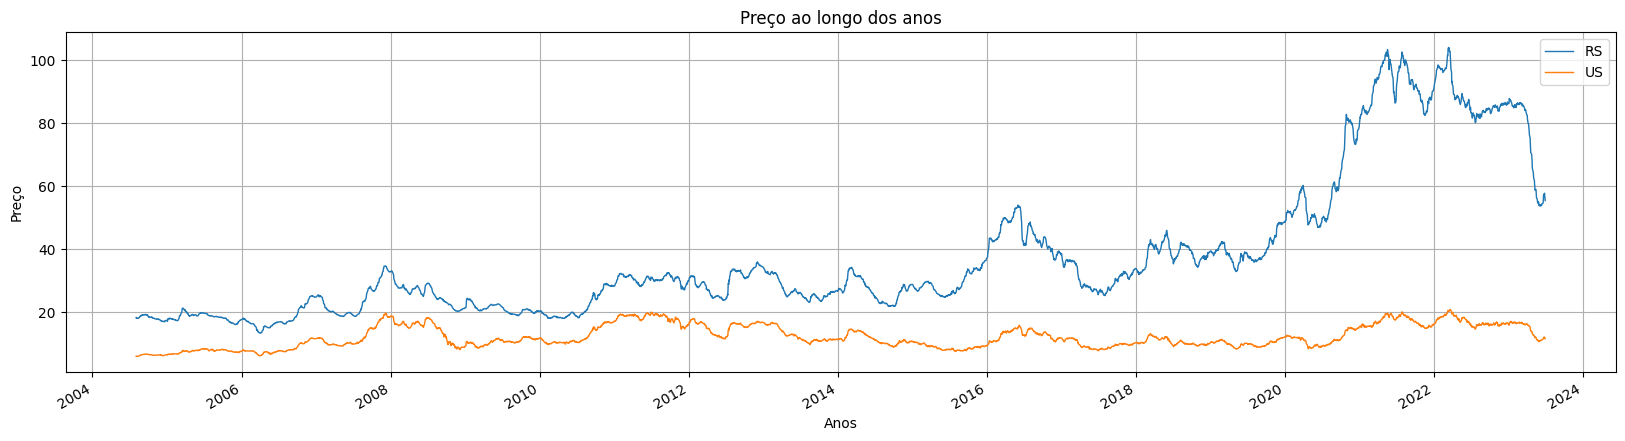

In [8]:
charts.plot_series_line(data=series, title_value='Preço ao longo dos anos', xlabel_value='Anos',ylabel_value='Preço')

## Decomposição

A decomposição de uma série temporal irá dividi-la nas componentes de tendência, sazonalidade e ciclicidade com resíduos.

Vamos analisar a decomposição da série observandos os valores semanais, mensais e anuais, tanto em soma quanto em média, para real e dólar

### Real

#### Semanal Aditivo

C:\Users\anaba\Downloads\Tera\Tera\Projeto\src\tera_project_charts.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


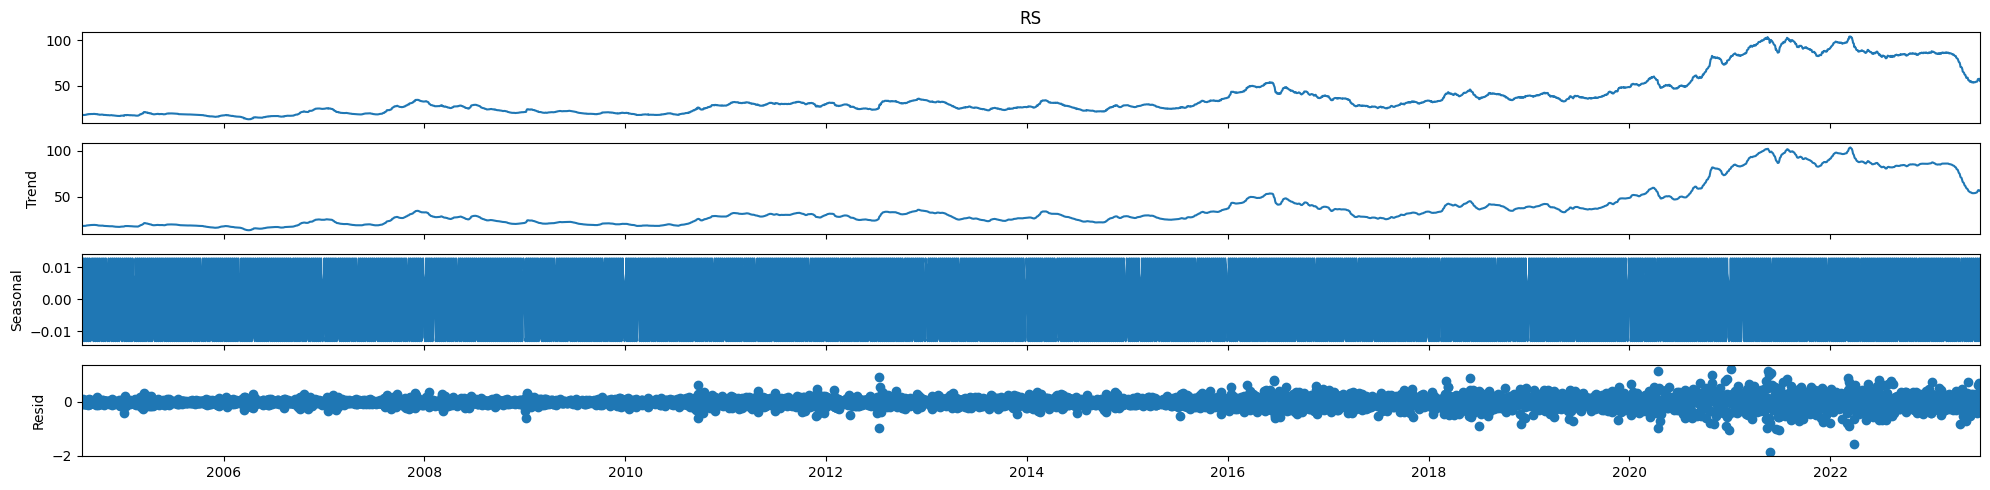

In [9]:
data = series['RS']
week_period = 5
month_period = 20
year_period = 252

semanal_real_add = charts.get_plot_seasonality(data,model='additive', period=week_period)

#### Semanal multiplicativo

C:\Users\anaba\Downloads\Tera\Tera\Projeto\src\tera_project_charts.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


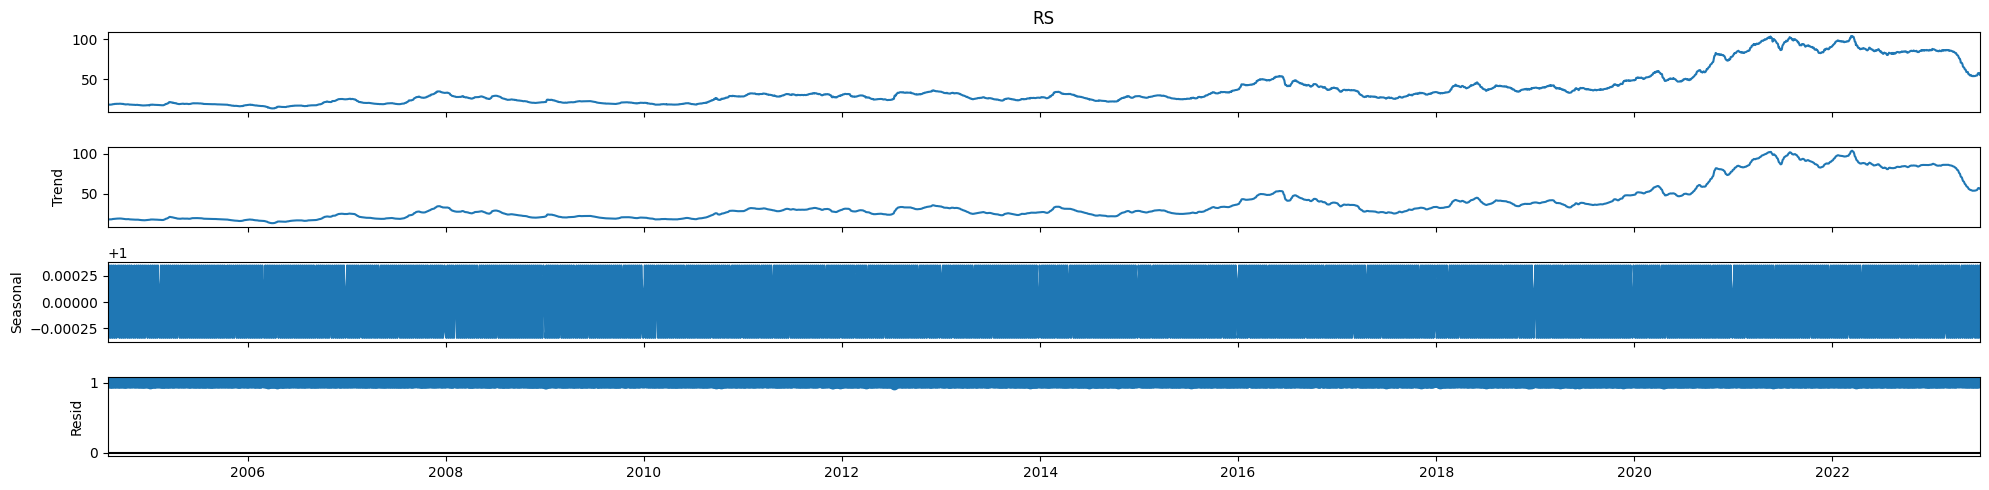

In [10]:
semanal_real_multi = charts.get_plot_seasonality(data,model='multiplicative', period=week_period)

#### Mensal aditivo

C:\Users\anaba\Downloads\Tera\Tera\Projeto\src\tera_project_charts.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


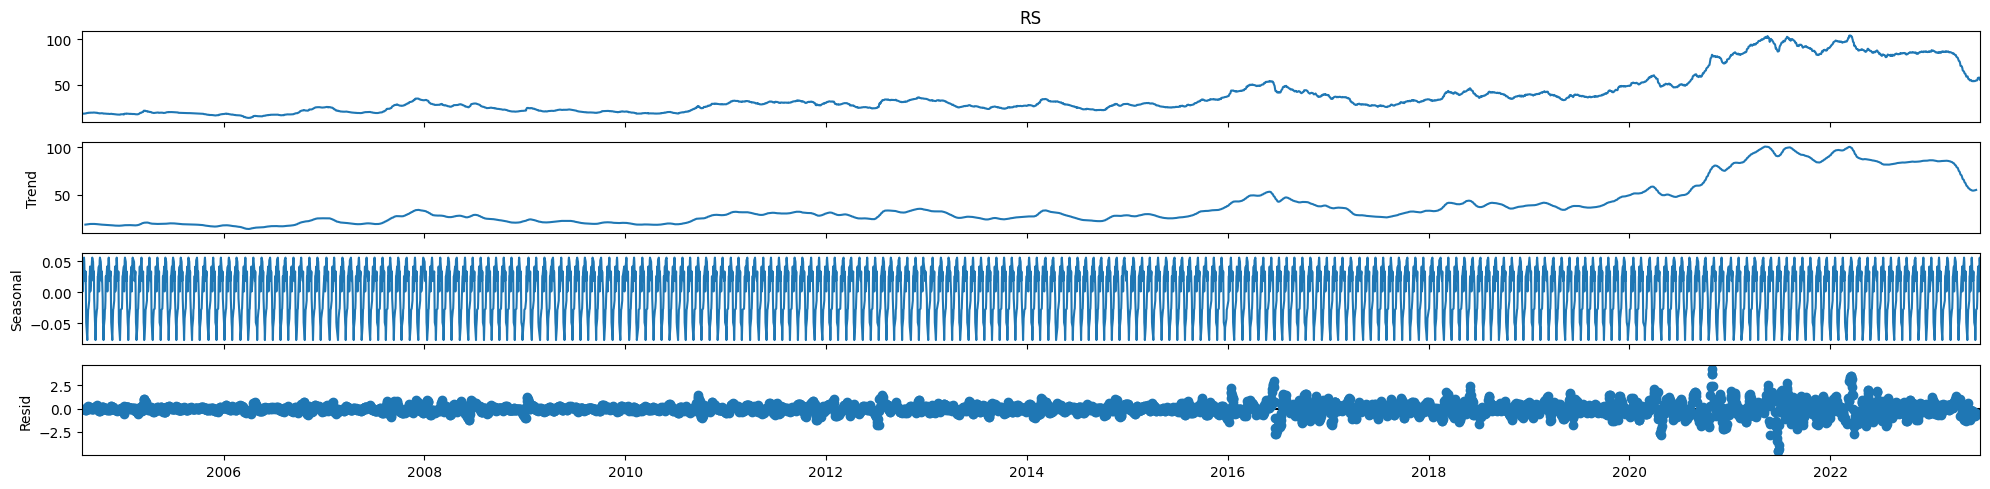

In [11]:
mensal_real_add = charts.get_plot_seasonality(data,model='additive', period=month_period)

#### Mensal multiplicativo

C:\Users\anaba\Downloads\Tera\Tera\Projeto\src\tera_project_charts.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


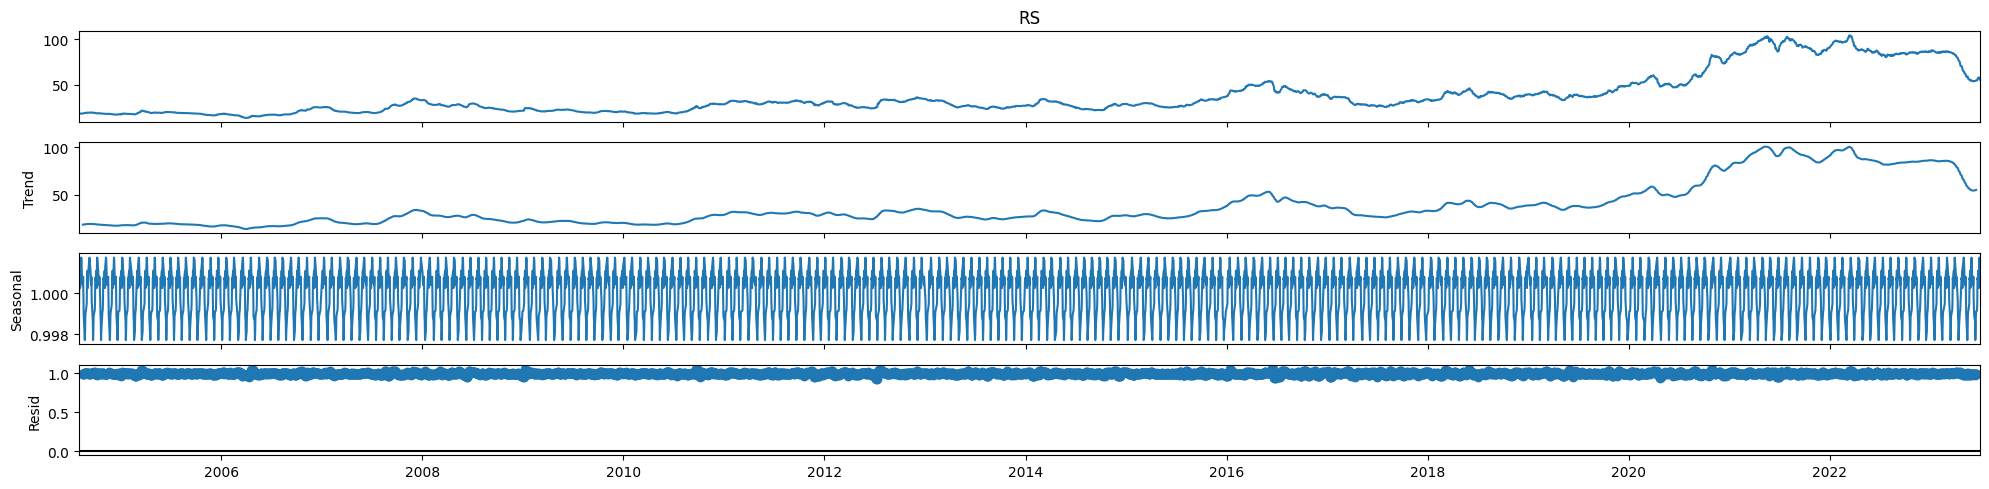

In [12]:
mensal_real_multi = charts.get_plot_seasonality(data,model='multiplicative', period=month_period)

#### Anual aditivo

C:\Users\anaba\Downloads\Tera\Tera\Projeto\src\tera_project_charts.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


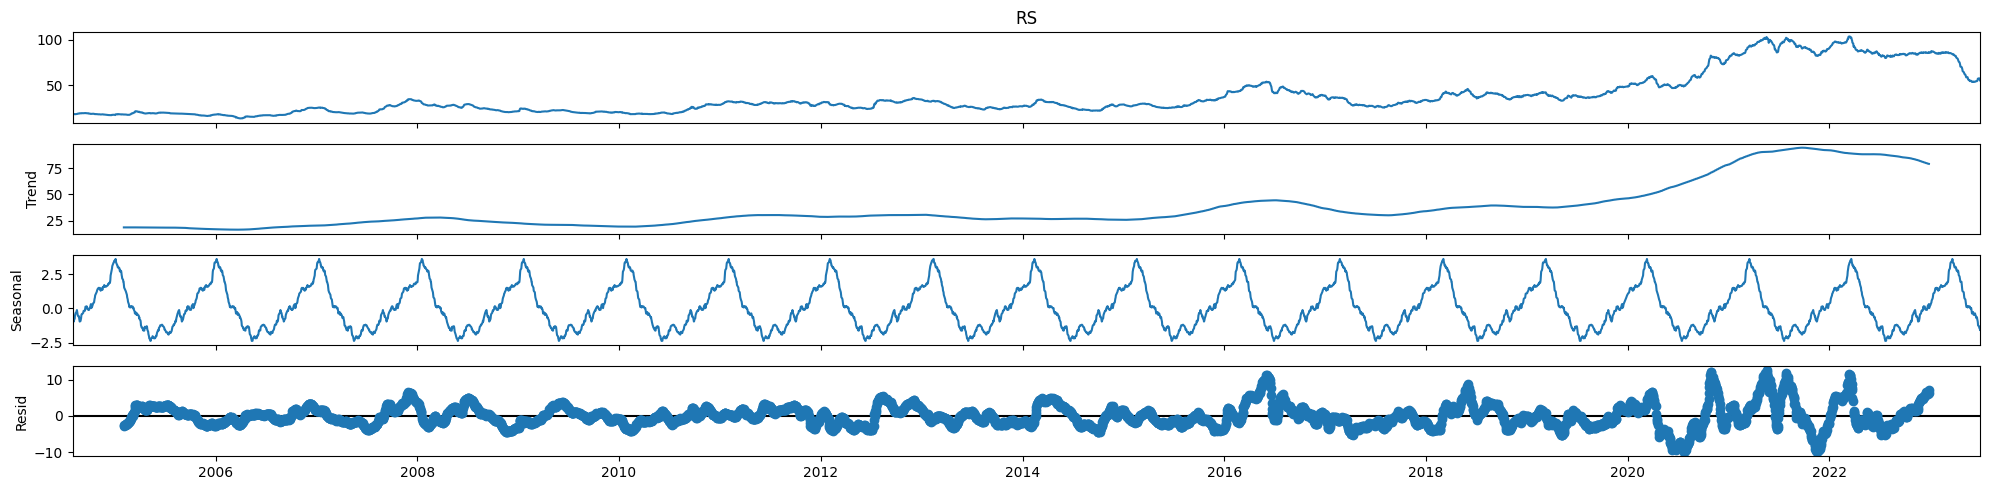

In [13]:
anual_real_add = charts.get_plot_seasonality(data,model='additive', period=year_period)

#### Anual multiplicativo

C:\Users\anaba\Downloads\Tera\Tera\Projeto\src\tera_project_charts.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


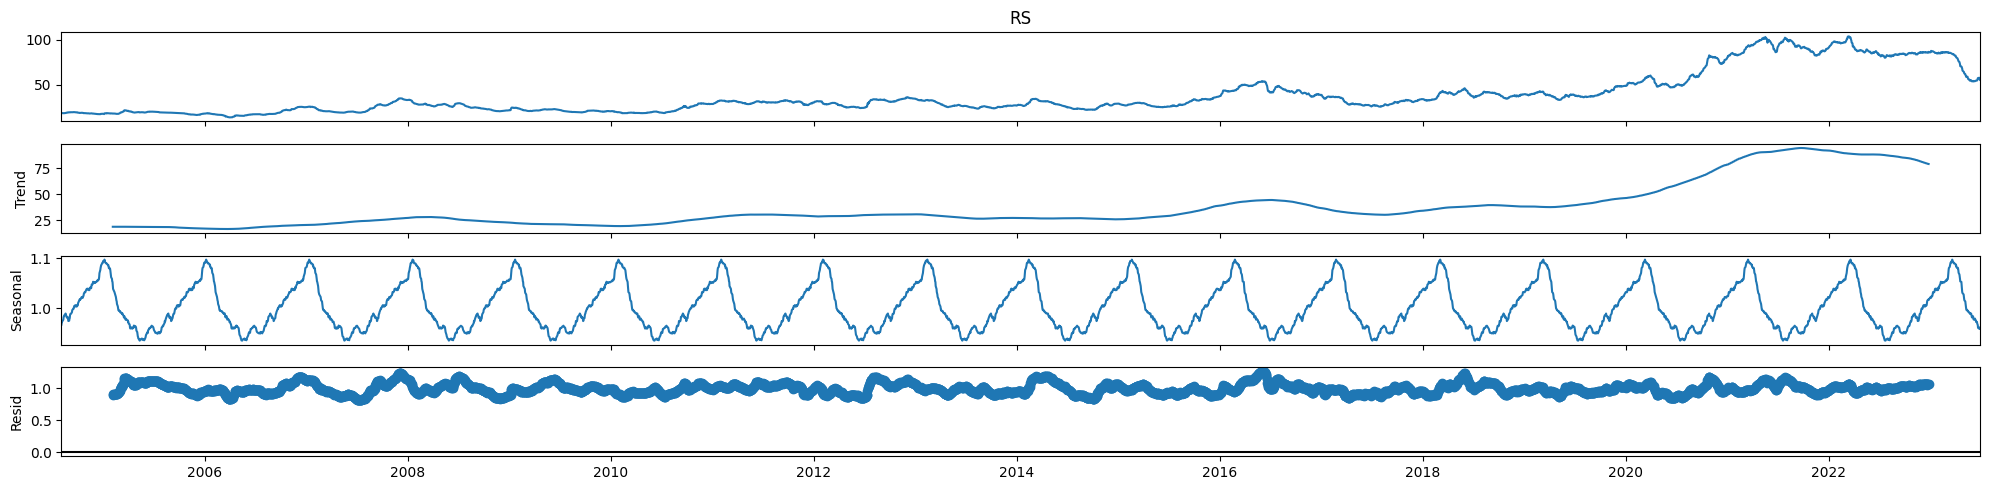

In [14]:
anual_real_multi = charts.get_plot_seasonality(data,model='multi', period=year_period)

#### Comentários

1) A tendência possui dois aumentos significativos, o primeiro sendo em 2016 e o segundo em 2020. Sendo o mais significativo em 2020. Isso pode ser explicado pela crise brasileira que começou em 2015 e teve seu aumento em 2016, levando a um grande aumento do dólar. E a segunda em 2020 é devido a pandemia de covid-19. Podemos observar essas mesmas características em dólar para notarmos se esse aumento é devido somente ao aumento no dólar.

C:\Users\anaba\Downloads\Tera\Tera\Projeto\src\tera_project_charts.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


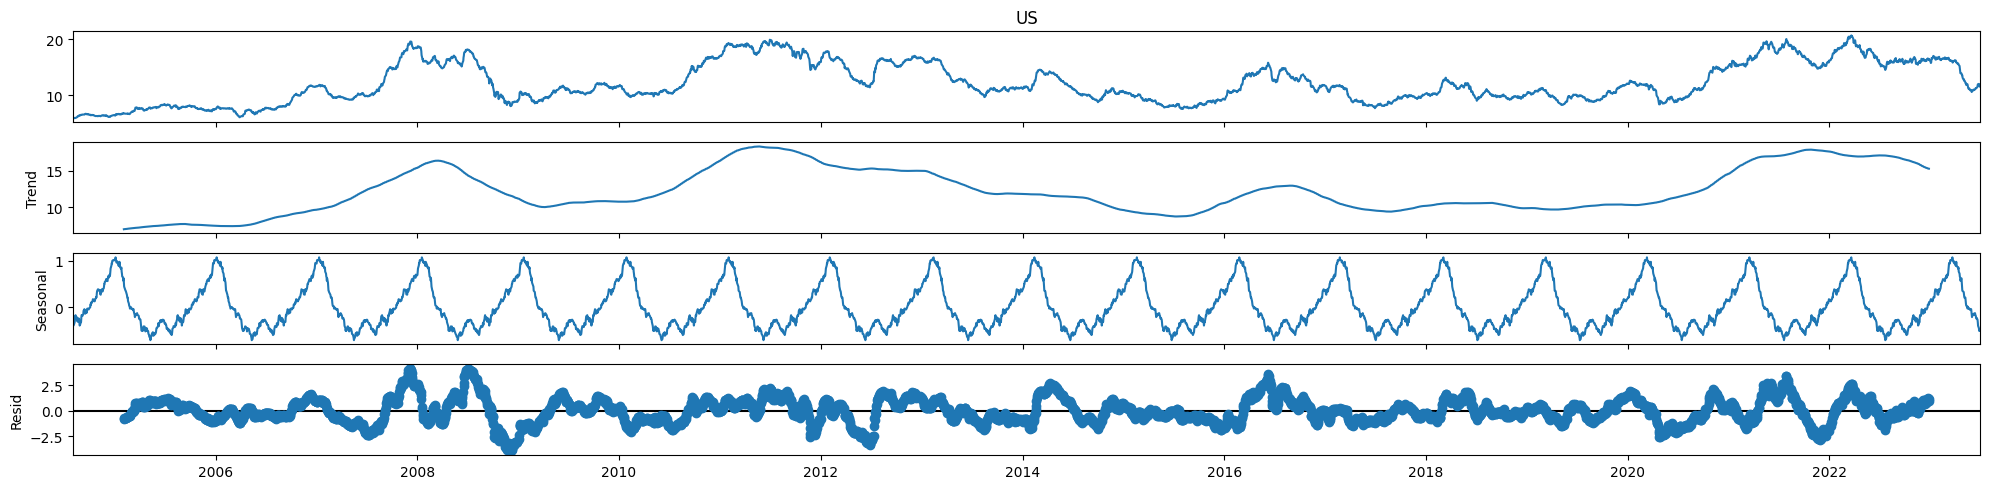

In [15]:
data = series['US']
a_dolar_add = charts.get_plot_seasonality(data,model='additive', period=year_period)

Notamos que em dólar existe um aumento na tendência de preço em 2008 e outra em 2011 que são bem menos relevantes no real. Esse aumento deve ser por conta da crise imobiliária americana em 2008 e em 2011 devido a crise da dívida dos EUA. Porém, também notamos um aumento na tendência tanto em 2016 quanto em 2020.

2) Podemos notar que a sazonalidade se destaca bem no período anual, o que é esperado para um produto de agricultura como o milho, já que temos uma variação de produção de acordo com as estações do ano.

Podemos observar também se existe uma diferença na sazonalidade dos preços em dois anos sem a pandemia da covid com os dois anos da pandemia.

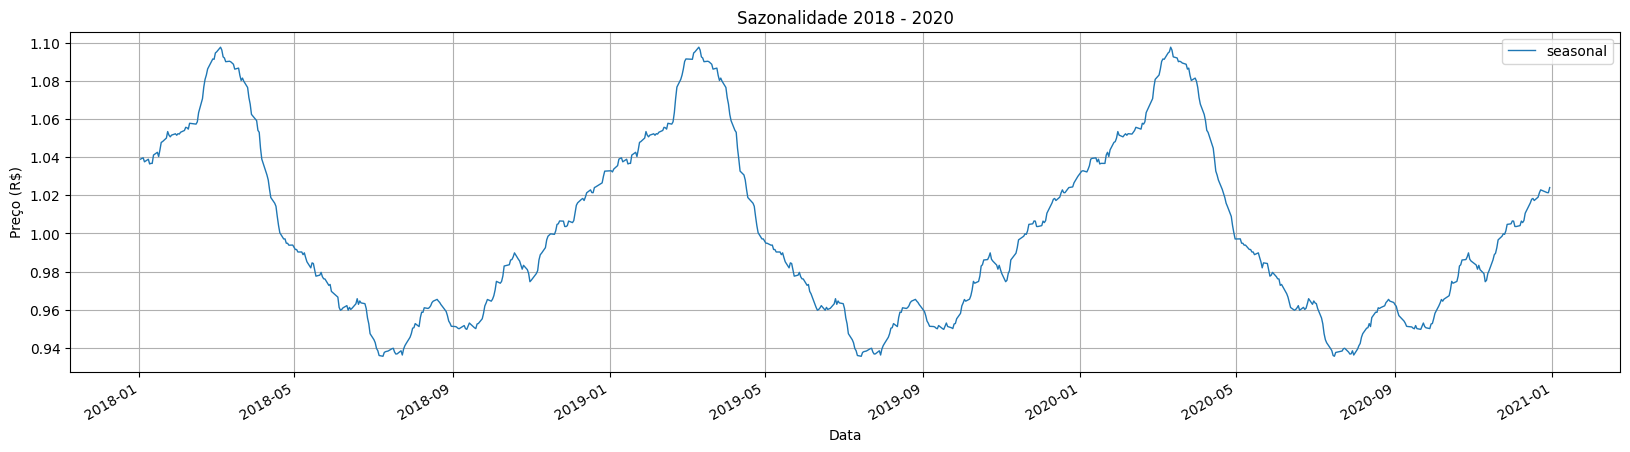

In [16]:
charts.plot_series_line(anual_real_multi.seasonal['2018':'2020'], title_value='Sazonalidade 2018 - 2020', ylabel_value='Preço (R$)', xlabel_value="Data")

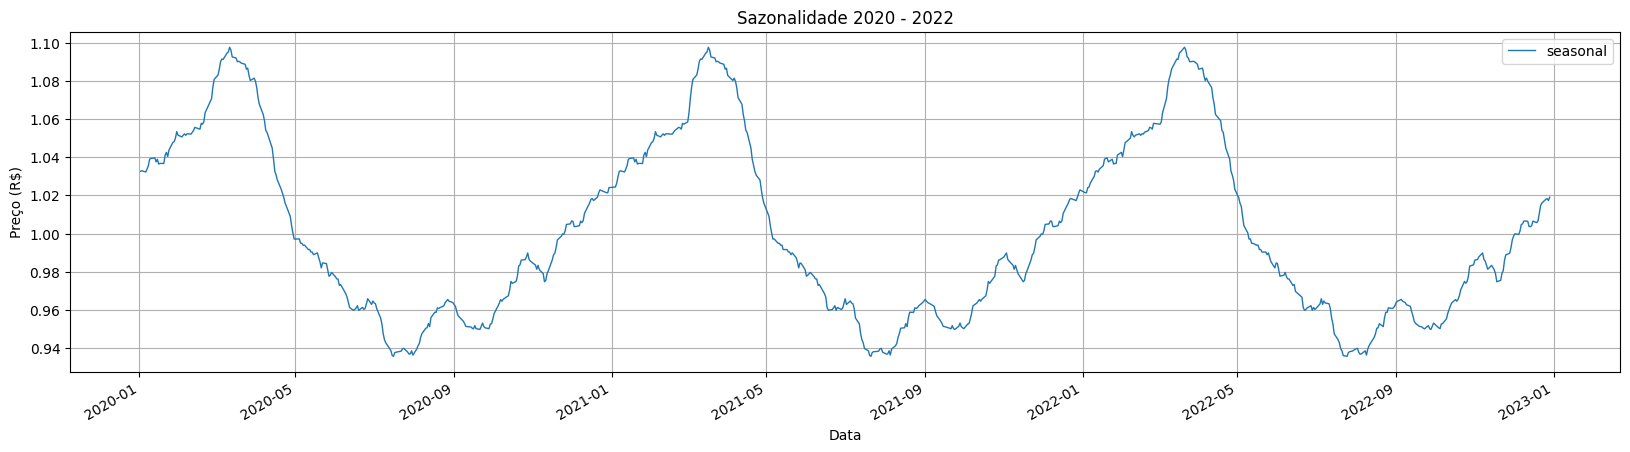

In [17]:
charts.plot_series_line(anual_real_multi.seasonal['2020':'2022'], title_value='Sazonalidade 2020 - 2022', ylabel_value='Preço (R$)', xlabel_value="Data")

A sazonalidade não parece ter mudado nos momentos de pandêmia.

    Pesquisar se a sazonalidade pode mudar ao longo da série temporal

## Normalidade

A maioria dos modelos para séries temporais são mais eficientes se usados em uma série com distribuição normal.

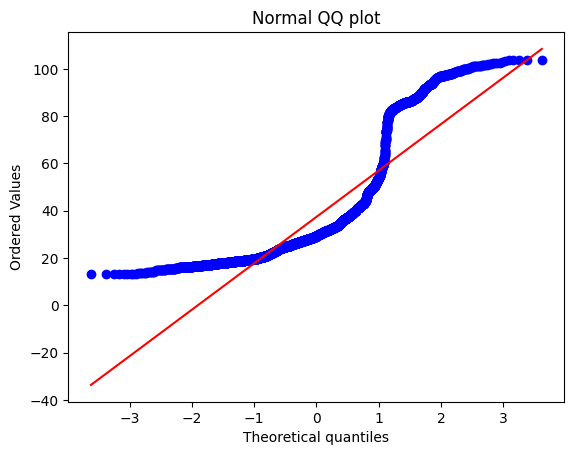

In [18]:
data = series['RS']
charts.get_QQ_plot(data)

Teste Shapiro-Wilk

Critérios:

Nível de significância de 0.05

H0 = distribuição normal (p > 0.05)

H1 = distribuição não normal (p <= 0.05)

In [19]:
data_log = np.log(data)
data_cubic_root = (data)**(1/3)
data_reciprocal = 1 / data
data_exponential = np.exp(data)
data_boxcox = stats.boxcox(data)[0]
data_yeojohnson = stats.yeojohnson(data)[0]

transformations = {
    'Original Data': data,
    'Log Transformation': data_log,
    'Cubic Root Transformation': data_cubic_root,
    'Reciprocal Transformation': data_reciprocal,
    'Exponential Transformation': data_exponential,
    'Box-Cox Transformation': data_boxcox,
    'Yeo-Johnson Transformation': data_yeojohnson
}

results = {}
for name, transformed_data in transformations.items():
    p_value = preprocess.test_normality(transformed_data, method='shapiro-wilk')
    results[name] = p_value

# Print the results
for name, p_value in results.items():
    print(f"{name} - Shapiro-Wilk P-Value: {p_value}")
    if p_value >= 0.05:
        print("The transformed data is normally distributed.")
    else:
        print("The transformed data is not normally distributed.")
    print("-------------------------------------")

Original Data - Shapiro-Wilk P-Value: 0.0
The transformed data is not normally distributed.
-------------------------------------
Log Transformation - Shapiro-Wilk P-Value: 2.802596928649634e-44
The transformed data is not normally distributed.
-------------------------------------
Cubic Root Transformation - Shapiro-Wilk P-Value: 0.0
The transformed data is not normally distributed.
-------------------------------------
Reciprocal Transformation - Shapiro-Wilk P-Value: 8.634957942803698e-28
The transformed data is not normally distributed.
-------------------------------------
Exponential Transformation - Shapiro-Wilk P-Value: 1.0
The transformed data is normally distributed.
-------------------------------------
Box-Cox Transformation - Shapiro-Wilk P-Value: 1.1582099721657627e-28
The transformed data is not normally distributed.
-------------------------------------
Yeo-Johnson Transformation - Shapiro-Wilk P-Value: 7.464060064534934e-29
The transformed data is not normally distribu

C:\Users\anaba\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1877: RuntimeWarning: overflow encountered in cast
  a, w, pw, ifault = _statlib.swilk(y, a[:N//2], init)


Como podemos observar, nenhuma transformação conseguiu trazer a normalidade para a série.

    Pesquisar se existe algum significado com o p-valor do Shapiro-wilk igual a zero ou igual a um

Vamos checar com outro tipo de teste, o D'Agostino-Pearson, usado para datasets com um grande número de amostragem.

In [20]:
for name, transformed_data in transformations.items():
    p_value = preprocess.test_normality(transformed_data, method='dagostino-pearson')
    results[name] = p_value

# Print the results
for name, p_value in results.items():
    print(f"{name} - D'Agostino-Pearson P-Value: {p_value}")
    if p_value >= 0.05:
        print("The transformed data is normally distributed.")
    else:
        print("The transformed data is not normally distributed.")
    print("-------------------------------------")

Original Data - D'Agostino-Pearson P-Value: 3.5710226838751646e-247
The transformed data is not normally distributed.
-------------------------------------
Log Transformation - D'Agostino-Pearson P-Value: 1.1483688263165574e-85
The transformed data is not normally distributed.
-------------------------------------
Cubic Root Transformation - D'Agostino-Pearson P-Value: 3.4013172573683054e-134
The transformed data is not normally distributed.
-------------------------------------
Reciprocal Transformation - D'Agostino-Pearson P-Value: 9.17738947389678e-49
The transformed data is not normally distributed.
-------------------------------------
Exponential Transformation - D'Agostino-Pearson P-Value: 0.0
The transformed data is not normally distributed.
-------------------------------------
Box-Cox Transformation - D'Agostino-Pearson P-Value: 1.966441376720035e-56
The transformed data is not normally distributed.
-------------------------------------
Yeo-Johnson Transformation - D'Agostino

Também nenhuma das transformações aplicadas resultaram em uma distribuição normalizada.
Porém, podemos tentar observar qual das transformações trouxe a série mais próxima da normalidade.

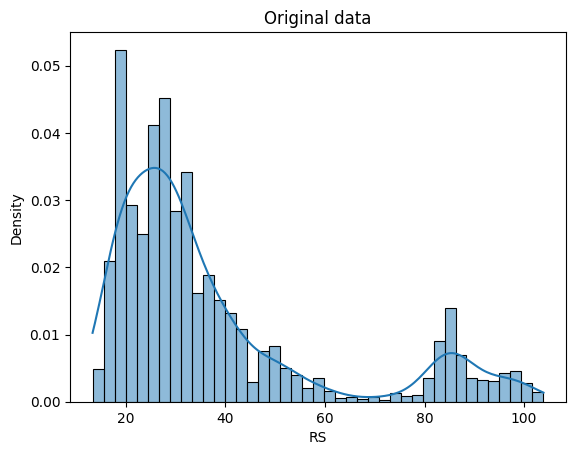

In [21]:
charts.get_density_plot(data, 'Original data')

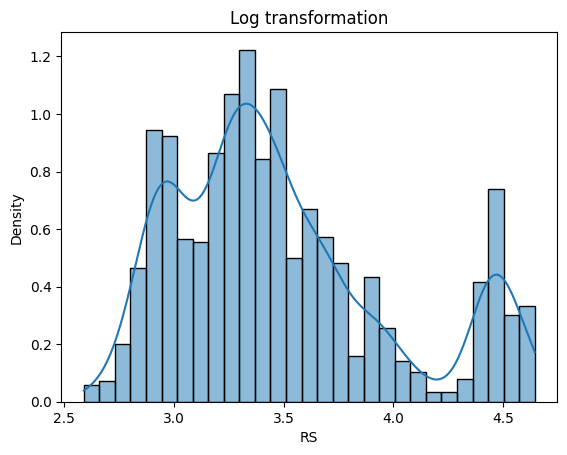

In [22]:
charts.get_density_plot(data_log, 'Log transformation')

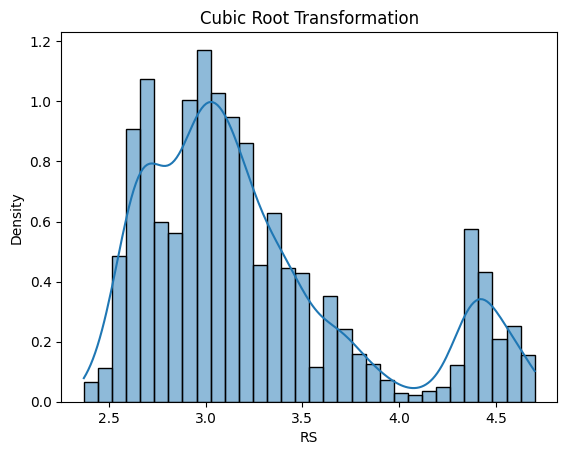

In [23]:
charts.get_density_plot(data_cubic_root, 'Cubic Root Transformation')

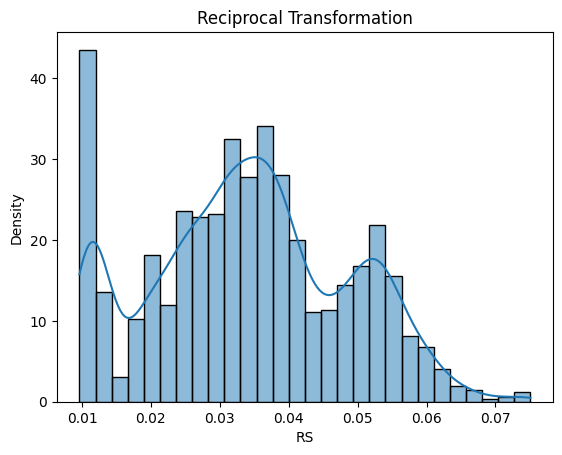

In [24]:
charts.get_density_plot(data_reciprocal, 'Reciprocal Transformation')

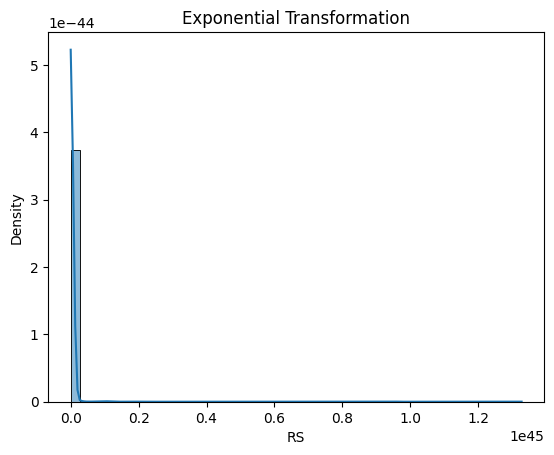

In [25]:
charts.get_density_plot(data_exponential, 'Exponential Transformation', bins=50)

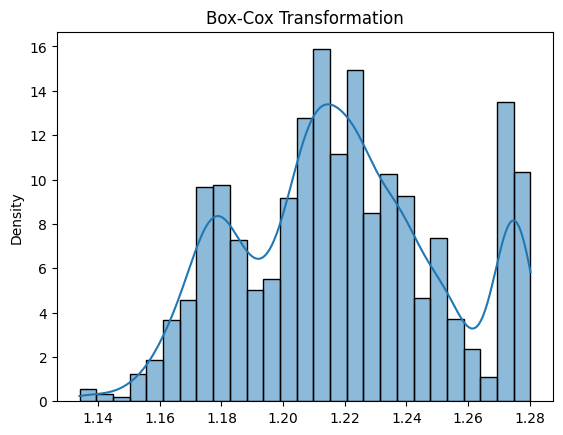

In [26]:
charts.get_density_plot(data_boxcox, 'Box-Cox Transformation')

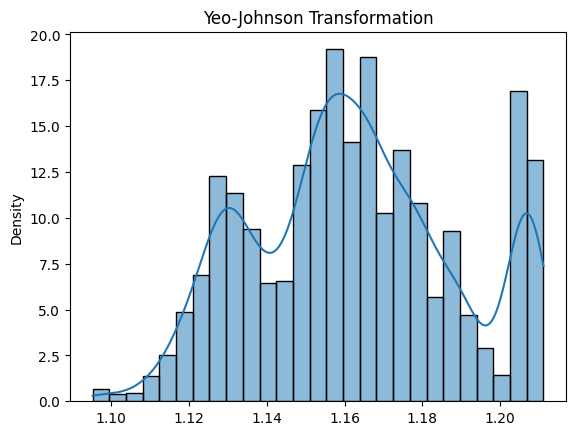

In [27]:
charts.get_density_plot(data_yeojohnson, 'Yeo-Johnson Transformation')

Como podemos observar, provavelmente pelo aumento dos preços na pandêmia, o gráfico de densidade da normalidade fica com um pico muito alto para os valores mais altos.

É importante checar se esse comportamento se repete nos valores em dólar.

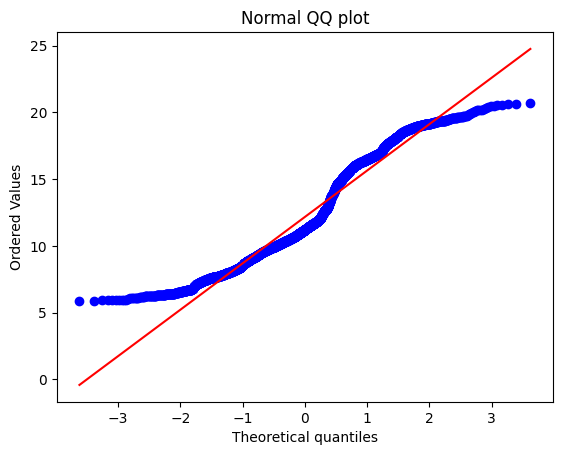

In [28]:
data = series['US']
charts.get_QQ_plot(data)


In [29]:
data_log = np.log(data)
data_cubic_root = (data)**(1/3)
data_reciprocal = 1 / data
data_exponential = np.exp(data)
data_boxcox = stats.boxcox(data)[0]
data_yeojohnson = stats.yeojohnson(data)[0]

transformations = {
    'Original Data': data,
    'Log Transformation': data_log,
    'Cubic Root Transformation': data_cubic_root,
    'Reciprocal Transformation': data_reciprocal,
    'Exponential Transformation': data_exponential,
    'Box-Cox Transformation': data_boxcox,
    'Yeo-Johnson Transformation': data_yeojohnson
}

results = {}
for name, transformed_data in transformations.items():
    p_value = preprocess.test_normality(transformed_data, method='shapiro-wilk')
    results[name] = p_value

for name, p_value in results.items():
    print(f"{name} - Shapiro-Wilk P-Value: {p_value}")
    if p_value >= 0.05:
        print("The transformed data is normally distributed.")
    else:
        print("The transformed data is not normally distributed.")
    print("-------------------------------------")

Original Data - Shapiro-Wilk P-Value: 2.5123529842263564e-38
The transformed data is not normally distributed.
-------------------------------------
Log Transformation - Shapiro-Wilk P-Value: 1.5344163164390863e-30
The transformed data is not normally distributed.
-------------------------------------
Cubic Root Transformation - Shapiro-Wilk P-Value: 3.0797240817461685e-32
The transformed data is not normally distributed.
-------------------------------------
Reciprocal Transformation - Shapiro-Wilk P-Value: 9.89097996664854e-36
The transformed data is not normally distributed.
-------------------------------------
Exponential Transformation - Shapiro-Wilk P-Value: 0.0
The transformed data is not normally distributed.
-------------------------------------
Box-Cox Transformation - Shapiro-Wilk P-Value: 1.4186554195215207e-30
The transformed data is not normally distributed.
-------------------------------------
Yeo-Johnson Transformation - Shapiro-Wilk P-Value: 9.765096763806288e-31
The

In [30]:
for name, transformed_data in transformations.items():
    p_value = preprocess.test_normality(transformed_data, method='dagostino-pearson')
    results[name] = p_value

# Print the results
for name, p_value in results.items():
    print(f"{name} - D'Agostino-Pearson P-Value: {p_value}")
    if p_value >= 0.05:
        print("The transformed data is normally distributed.")
    else:
        print("The transformed data is not normally distributed.")
    print("-------------------------------------")

Original Data - D'Agostino-Pearson P-Value: 5.038397701580994e-186
The transformed data is not normally distributed.
-------------------------------------
Log Transformation - D'Agostino-Pearson P-Value: 8.606411549094119e-148
The transformed data is not normally distributed.
-------------------------------------
Cubic Root Transformation - D'Agostino-Pearson P-Value: 1.279942271544552e-204
The transformed data is not normally distributed.
-------------------------------------
Reciprocal Transformation - D'Agostino-Pearson P-Value: 1.1628591352914036e-48
The transformed data is not normally distributed.
-------------------------------------
Exponential Transformation - D'Agostino-Pearson P-Value: 0.0
The transformed data is not normally distributed.
-------------------------------------
Box-Cox Transformation - D'Agostino-Pearson P-Value: 2.732071196047299e-150
The transformed data is not normally distributed.
-------------------------------------
Yeo-Johnson Transformation - D'Agostin

Mesmo com as transformações, os dados em dólar também não atingem a normalidade.

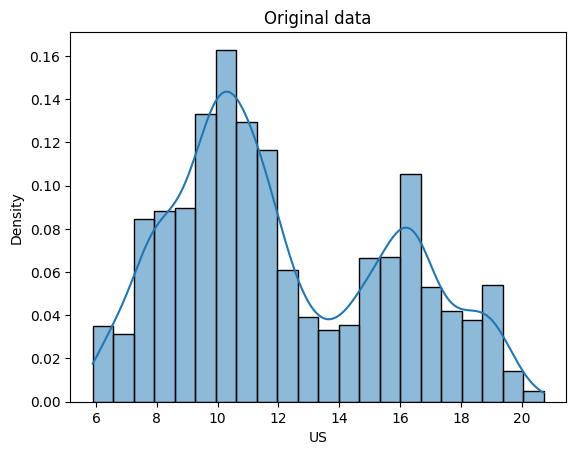

In [31]:
charts.get_density_plot(data, 'Original data')

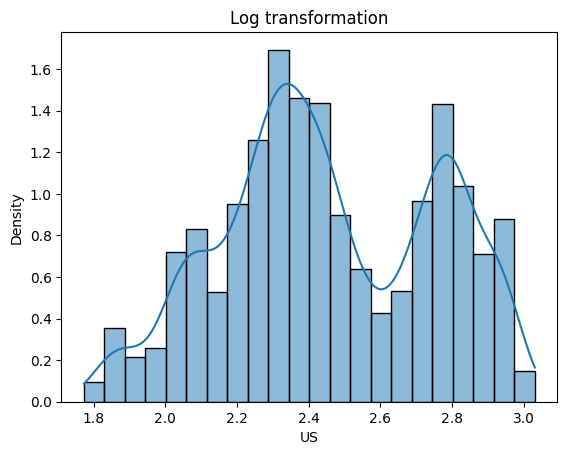

In [32]:
charts.get_density_plot(data_log, 'Log transformation')

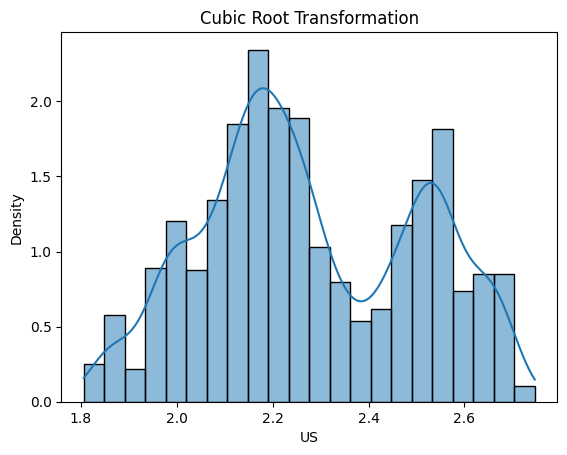

In [33]:
charts.get_density_plot(data_cubic_root, 'Cubic Root Transformation')

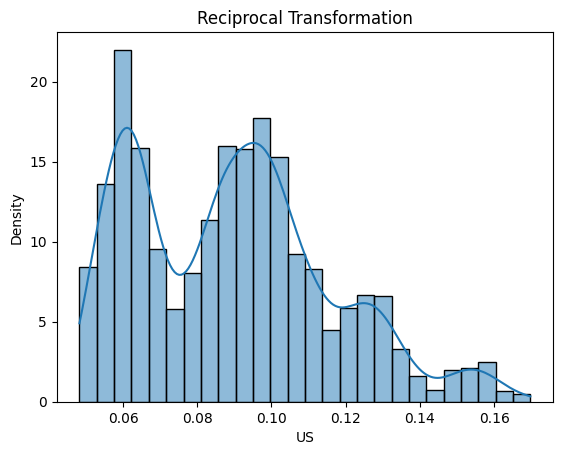

In [34]:
charts.get_density_plot(data_reciprocal, 'Reciprocal Transformation')

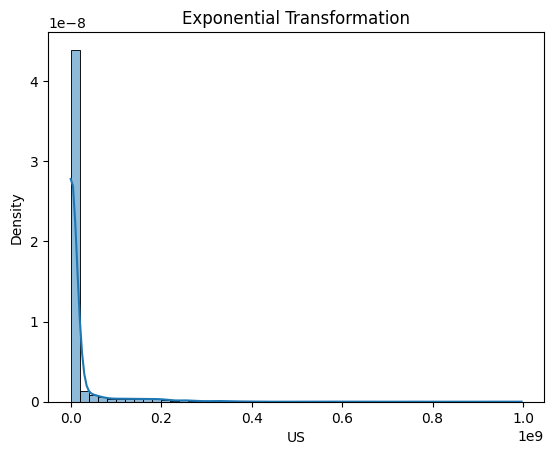

In [35]:
charts.get_density_plot(data_exponential, 'Exponential Transformation', bins=50)

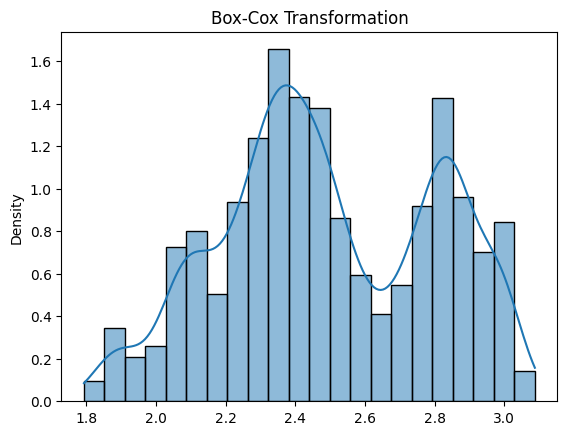

In [36]:
charts.get_density_plot(data_boxcox, 'Box-Cox Transformation')

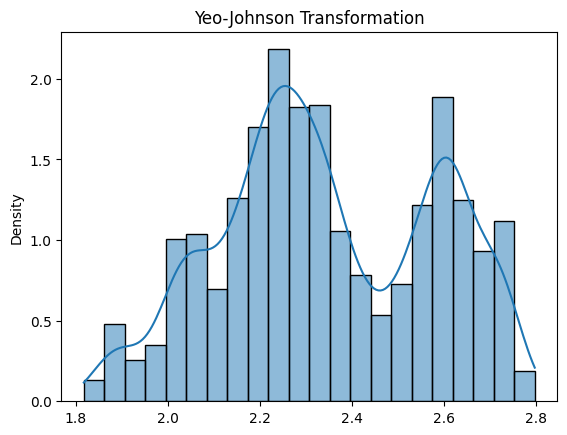

In [37]:
charts.get_density_plot(data_yeojohnson, 'Yeo-Johnson Transformation')

Podemos observar que os dados em dólar ficam também com alguns picos em diferentes valores.

    Devemos escolher o que se aproxima mais da normal?
    p-valor mais alto?

    R. Devemos focar mais na estacionaridade

## Estacionaridade

Augmented Dickey-Fuller Test

Critérios:

Nível de significância de 0.05

H0: não estacionaria (p > 0.05)

H1: estacionaria (p <= 0.05)

In [38]:
data = series['RS']
p_value = preprocess.test_stacionarity(data)
if p_value > 0.05:
    print("The data is not stacionary.")
else:
    print("The data is stacionary.")


The data is not stacionary.


A série original não é estacionária, dessa forma, podemos aplicar o método da diferenciação ou log.

In [39]:
data_log = np.log(data)
p_value = preprocess.test_stacionarity(data_log)
if p_value > 0.05:
    print("The data is not stacionary.")
else:
    print("The data is stacionary.")


The data is not stacionary.


In [40]:
data_diff = np.diff(data)
p_value = preprocess.test_stacionarity(data_diff)
if p_value > 0.05:
    print("The data is not stacionary.")
else:
    print("The data is stacionary.")

The data is stacionary.


Também podemos checar se os dados após a diferenciação possuem uma distribuição normal.

In [41]:
p_value = preprocess.test_normality(data_diff, method='shapiro-wilk')
print(f'p-value for Shapiro-Wilk test: {p_value}')
if p_value >= 0.05:
    print("The transformed data is normally distributed.")
else:
    print("The transformed data is not normally distributed.")

p-value for Shapiro-Wilk test: 0.0
The transformed data is not normally distributed.


In [42]:
p_value = preprocess.test_normality(data_diff, method='dagostino-pearson')
print(f'p-value for DAgostino-Pearson test: {p_value}')
if p_value >= 0.05:
    print("The transformed data is normally distributed.")
else:
    print("The transformed data is not normally distributed.")

p-value for DAgostino-Pearson test: 6.7069974891108555e-171
The transformed data is not normally distributed.


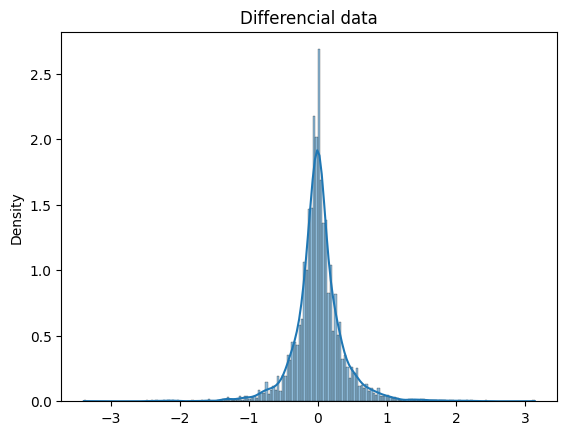

In [43]:
charts.get_density_plot(data_diff, 'Differencial data')

Os dados também não se tornam normalizados após a aplicação de diferenciação.

## Autocorrelação

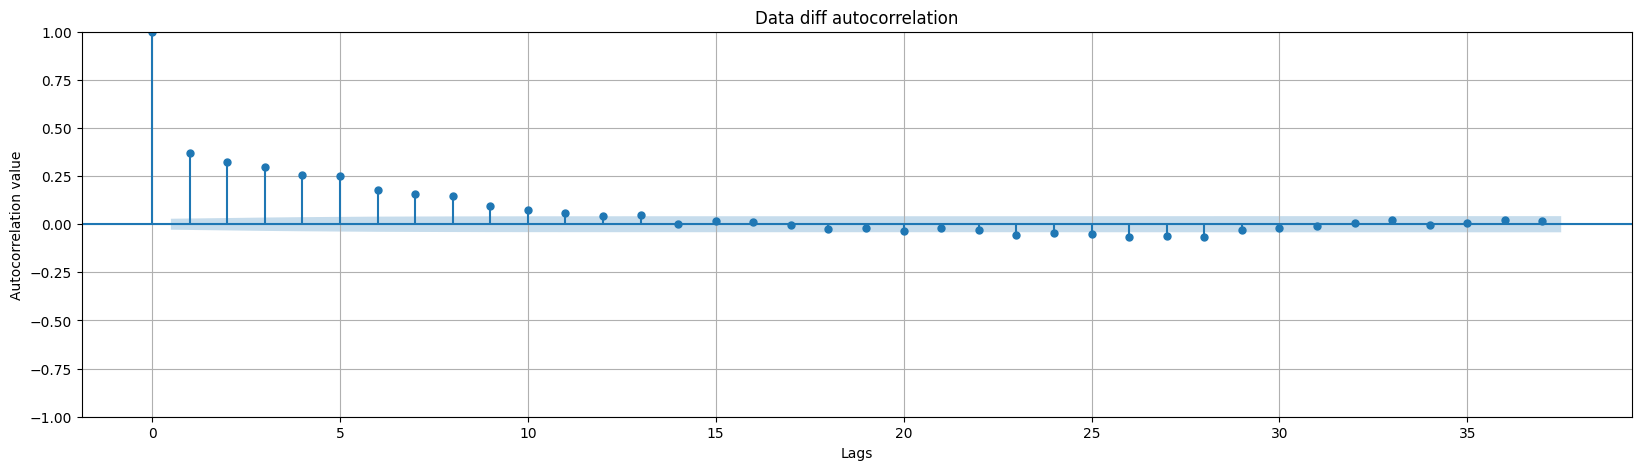

[[0, 1.0],
 [1, 0.3674366558417326],
 [2, 0.32512194258024035],
 [3, 0.2968995278407758],
 [4, 0.25398816136252206],
 [5, 0.25216532924048796],
 [6, 0.17658623987694136],
 [7, 0.1555235784558726],
 [8, 0.14502572085107393],
 [9, 0.09600283814720503],
 [10, 0.07266840980559679],
 [11, 0.05641500836287973],
 [23, -0.0561327112562569],
 [25, -0.052728355343129134],
 [26, -0.06831904353057248],
 [27, -0.061684269445215385],
 [28, -0.06783530379702987]]

In [44]:
alpha = 0.05
acf = preprocess.acf_info(data_diff, alpha=alpha, title_value='Data diff autocorrelation')
relevant_acf = []
for i in range(len(acf)):
    if abs(acf[i]) >= alpha:
        relevant_acf.append([i, acf[i]])

relevant_acf

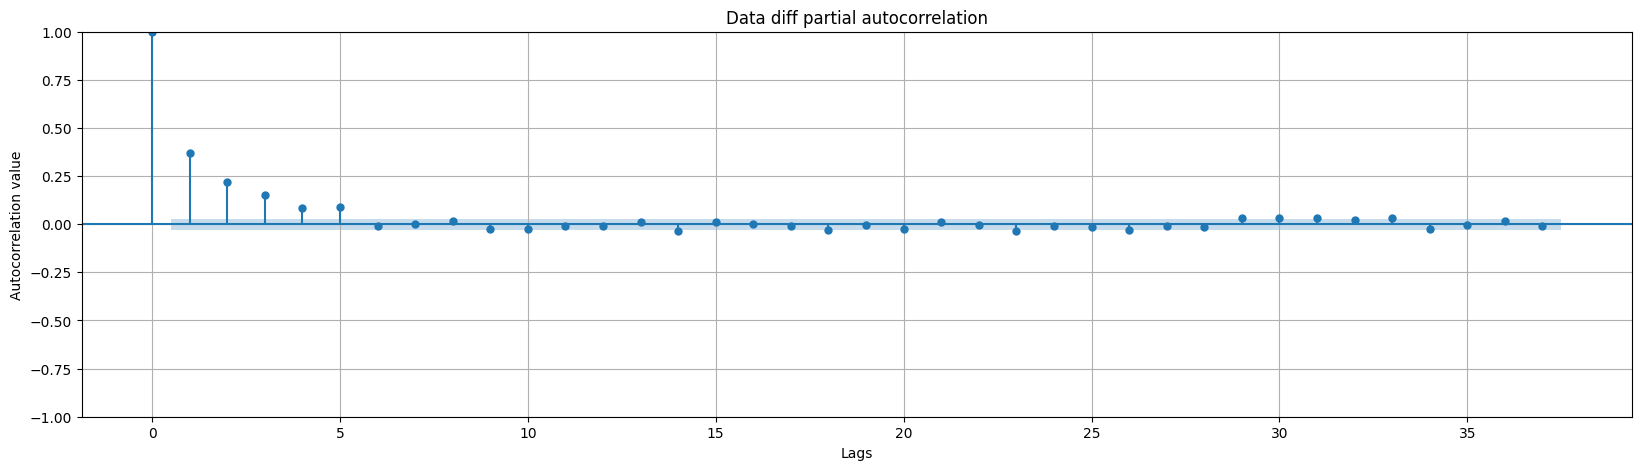

[[0, 1.0],
 [1, 0.3675147175914333],
 [2, 0.21989340582469313],
 [3, 0.14946043151665397],
 [4, 0.08236189280834814],
 [5, 0.088441839920041]]

In [45]:
pacf = preprocess.pacf_info(data_diff, alpha=alpha, title_value='Data diff partial autocorrelation')
relevant_pacf = []
for i in range(len(pacf)):
    if abs(pacf[i]) >= alpha:
        relevant_pacf.append([i, pacf[i]])

relevant_pacf

É possível notar que existe correlações relevantes para a autocorrelação e para a autocorrelação parcial usando um intervalo de confiança de 95%. No primeiro, até o lag 11 e em seguida à partir do lag 23 até o 28. E na parcial, até o lag 5.

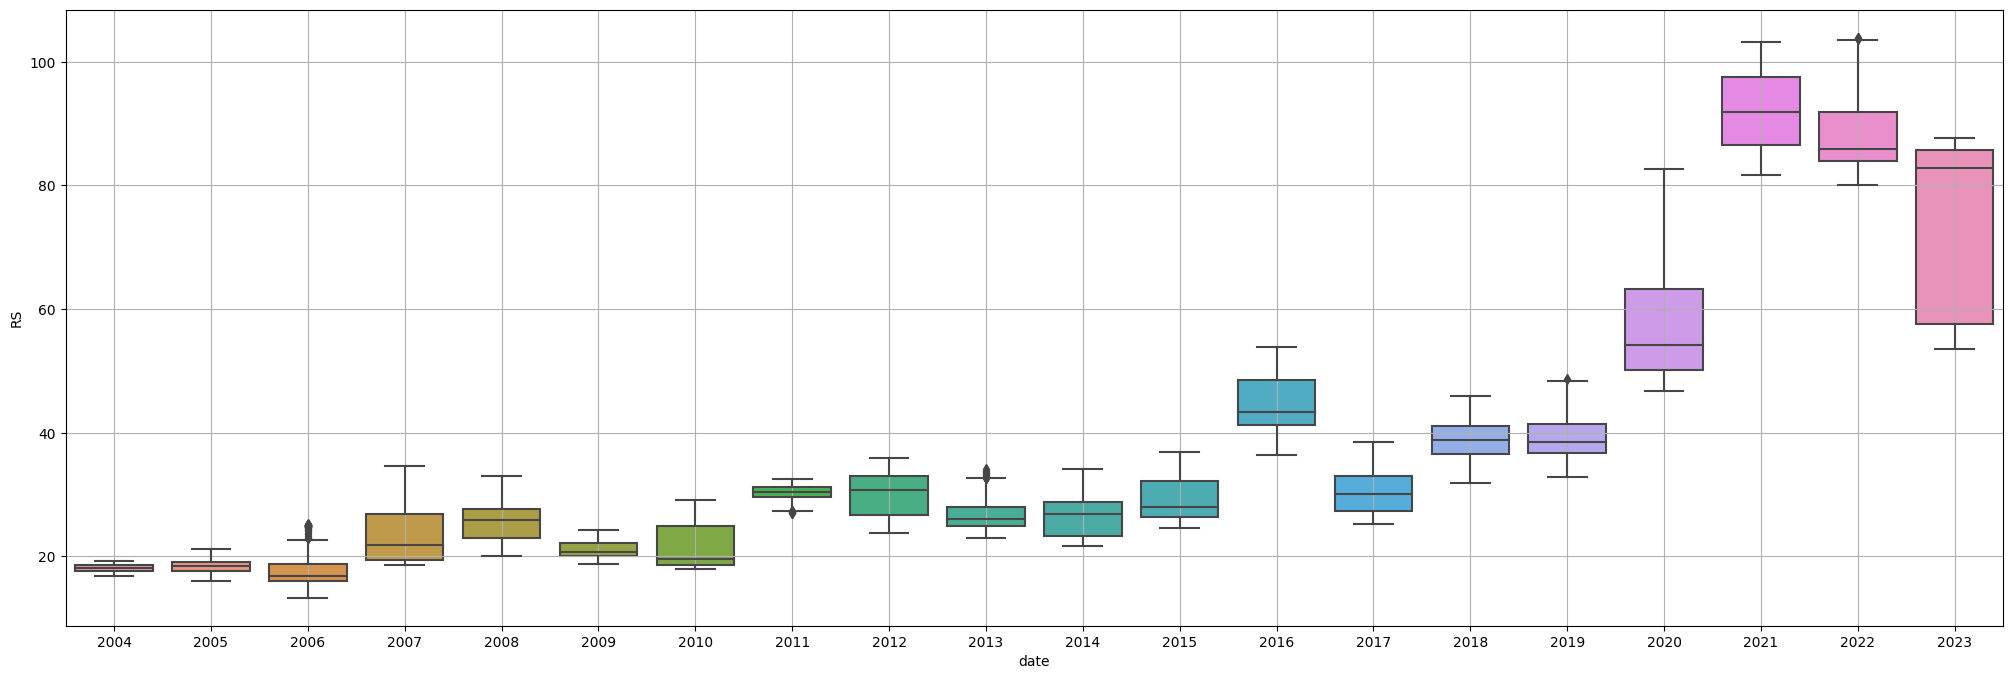

In [46]:
# https://archive.is/KkNL2#selection-849.0-859.24

import seaborn as sns
fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = series.index.year, 
            y = series['RS'], 
            ax = ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

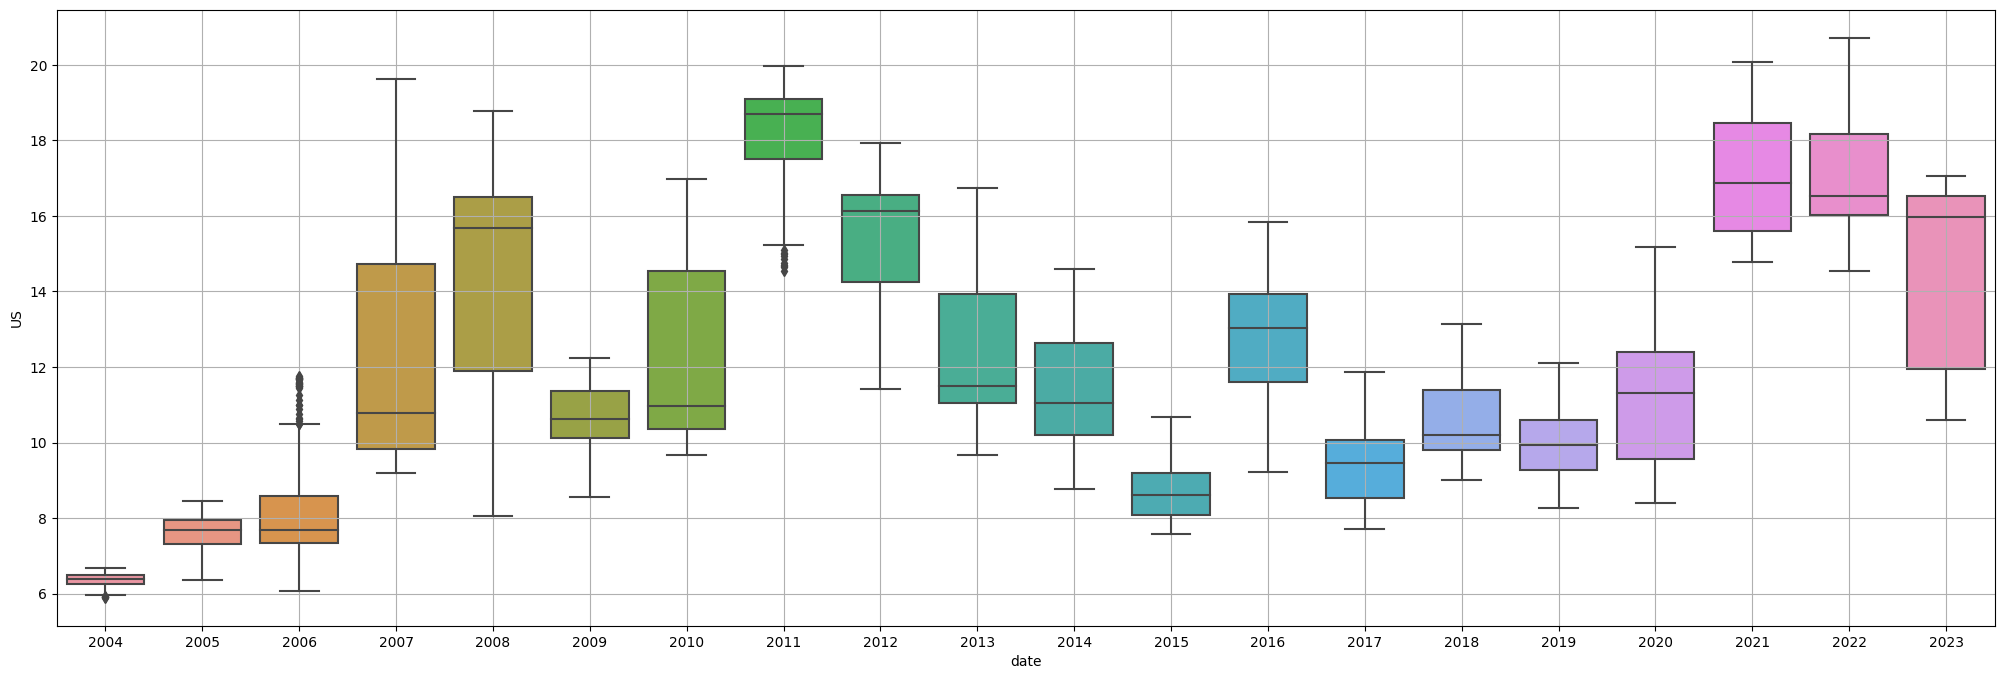

In [47]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = series.index.year, 
            y = series['US'], 
            ax = ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [48]:
import plotly.express as px
import pandas as pd

fig = px.line(series, x=series.index, y='US', title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [49]:
import requests
requisicao = requests.get("https://economia.awesomeapi.com.br/last/USD-BRL,EUR-BRL,BTC-BRL")
requisicao_dict = requisicao.json()
requisicao_dict['USDBRL']['bid']

'4.935'

A maioria dos modelos para séries temporais são mais eficientes se usados em uma série com distribuição normal.

    1) A transformação mais usada é a log, indicada para distribuição assimétrica positiva e variação crescente com a média, porém, restrita a valores positivos.
    2) Transformação exponencial é usada quando não podemos usar a log
    3) Box-cox só pode ser usada em valores positivos e utiliza a função lambda.

Vários modelos possuem o pressuposto de que a série precisa ser estacionária

    1) A diferenciação pode ser usada para isso e pode ser usada mais de uma vez
    

In [50]:
# Módulos de manipulação de dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install scikit-learn
#!pip install lightgbm
# Módulos de DataPrep
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split

import warnings
warnings.filterwarnings('ignore')

# Modelos de regressão que iremos testar
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

# Métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error

import sys
sys.path.append('C:\\Users\\anaba\\Downloads\\Tera\\Tera\\Projeto')
import src.tera_project_preprocess as preprocess
import src.tera_project_preprocess as preprocess
import src.tera_project_charts as charts
import src.EDA_import as EDA

https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775

In [51]:
series_RS = series.drop('US', axis=1)
series_RS

RS
date             
2004-08-02  18.24
2004-08-03  18.04
2004-08-04  18.02
2004-08-05  18.06
2004-08-06  18.13
...           ...
2023-06-26  57.41
2023-06-27  57.67
2023-06-28  56.36
2023-06-29  56.12
2023-06-30  55.36

[4709 rows x 1 columns]

In [52]:
series_RS.isnull().sum()

RS    0
dtype: int64

In [53]:
def constroi_features_defasadas(base,lista_features,defasagem_maxima):
    # Constrói features defasadas com base na base original
    # Copia a base
    base_cop = base.copy()
    for feat in lista_features:       
        for i in range(1,defasagem_maxima+1):
            base_cop[str(feat)+'_def_'+str(i)] = base_cop[feat].shift(i)
    return base_cop

In [54]:
base_com_target = series_RS
base_com_target['target'] = base_com_target.RS.shift(-10)

In [55]:
base_com_target.head()

RS  target
date                     
2004-08-02  18.24   18.20
2004-08-03  18.04   18.22
2004-08-04  18.02   18.26
2004-08-05  18.06   18.35
2004-08-06  18.13   18.58

In [56]:
# Incluindo features de informação do tempo
base_com_target['mes'] = base_com_target.index.month
base_com_target['dia_da_semana'] = base_com_target.index.dayofweek
base_com_target.head()

RS  target  mes  dia_da_semana
date                                         
2004-08-02  18.24   18.20    8              0
2004-08-03  18.04   18.22    8              1
2004-08-04  18.02   18.26    8              2
2004-08-05  18.06   18.35    8              3
2004-08-06  18.13   18.58    8              4

In [57]:
# Vamos construir features até 10 dias atrás
base_inicial_eng = constroi_features_defasadas(base_com_target,
                                               ['RS']
                                               ,10)
base_inicial_eng

RS  target  mes  dia_da_semana  RS_def_1  RS_def_2  RS_def_3  \
date                                                                          
2004-08-02  18.24   18.20    8              0       NaN       NaN       NaN   
2004-08-03  18.04   18.22    8              1     18.24       NaN       NaN   
2004-08-04  18.02   18.26    8              2     18.04     18.24       NaN   
2004-08-05  18.06   18.35    8              3     18.02     18.04     18.24   
2004-08-06  18.13   18.58    8              4     18.06     18.02     18.04   
...           ...     ...  ...            ...       ...       ...       ...   
2023-06-26  57.41     NaN    6              0     57.36     57.07     55.52   
2023-06-27  57.67     NaN    6              1     57.41     57.36     57.07   
2023-06-28  56.36     NaN    6              2     57.67     57.41     57.36   
2023-06-29  56.12     NaN    6              3     56.36     57.67     57.41   
2023-06-30  55.36     NaN    6              4     56.12     56.36     57.67   

            RS_def_4  RS_def_5  RS_def_6  RS_def_7  RS_def_8  RS_def_9  \
date                                                                     
2004-08-02       NaN       NaN       NaN       NaN       NaN       NaN   
2004-08-03       NaN       NaN       NaN       NaN       NaN       NaN   
2004-08-04       NaN       NaN       NaN       NaN       NaN       NaN   
2004-08-05       NaN       NaN       NaN       NaN       NaN       NaN   
2004-08-06     18.24       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2023-06-26     54.83     54.47     54.36     54.35     54.33     54.07   
2023-06-27     55.52     54.83     54.47     54.36     54.35     54.33   
2023-06-28     57.07     55.52     54.83     54.47     54.36     54.35   
2023-06-29     57.36     57.07     55.52     54.83     54.47     54.36   
2023-06-30     57.41     57.36     57.07     55.52     54.83     54.47   

            RS_def_10  
date                   
2004-08-02        NaN  
2004-08-03        NaN  
2004-08-04        NaN  
2004-08-05        NaN  
2004-08-06        NaN  
...               ...  
2023-06-26      53.77  
2023-06-27      54.07  
2023-06-28      54.33  
2023-06-29      54.35  
2023-06-30      54.36  

[4709 rows x 14 columns]

In [58]:
base_inicial_eng = base_inicial_eng.dropna()

In [59]:
print(base_inicial_eng.isna().sum())

RS               0
target           0
mes              0
dia_da_semana    0
RS_def_1         0
RS_def_2         0
RS_def_3         0
RS_def_4         0
RS_def_5         0
RS_def_6         0
RS_def_7         0
RS_def_8         0
RS_def_9         0
RS_def_10        0
dtype: int64


In [60]:
base_inicial_eng

RS  target  mes  dia_da_semana  RS_def_1  RS_def_2  RS_def_3  \
date                                                                          
2004-08-16  18.20   18.94    8              0     18.04     18.07     18.08   
2004-08-17  18.22   18.97    8              1     18.20     18.04     18.07   
2004-08-18  18.26   19.11    8              2     18.22     18.20     18.04   
2004-08-19  18.35   19.13    8              3     18.26     18.22     18.20   
2004-08-20  18.58   18.99    8              4     18.35     18.26     18.22   
...           ...     ...  ...            ...       ...       ...       ...   
2023-06-12  53.77   57.41    6              0     53.73     53.72     54.07   
2023-06-13  54.07   57.67    6              1     53.77     53.73     53.72   
2023-06-14  54.33   56.36    6              2     54.07     53.77     53.73   
2023-06-15  54.35   56.12    6              3     54.33     54.07     53.77   
2023-06-16  54.36   55.36    6              4     54.35     54.33     54.07   

            RS_def_4  RS_def_5  RS_def_6  RS_def_7  RS_def_8  RS_def_9  \
date                                                                     
2004-08-16     17.98     17.97     18.13     18.06     18.02     18.04   
2004-08-17     18.08     17.98     17.97     18.13     18.06     18.02   
2004-08-18     18.07     18.08     17.98     17.97     18.13     18.06   
2004-08-19     18.04     18.07     18.08     17.98     17.97     18.13   
2004-08-20     18.20     18.04     18.07     18.08     17.98     17.97   
...              ...       ...       ...       ...       ...       ...   
2023-06-12     53.63     53.72     53.90     53.77     54.27     54.83   
2023-06-13     54.07     53.63     53.72     53.90     53.77     54.27   
2023-06-14     53.72     54.07     53.63     53.72     53.90     53.77   
2023-06-15     53.73     53.72     54.07     53.63     53.72     53.90   
2023-06-16     53.77     53.73     53.72     54.07     53.63     53.72   

            RS_def_10  
date                   
2004-08-16      18.24  
2004-08-17      18.04  
2004-08-18      18.02  
2004-08-19      18.06  
2004-08-20      18.13  
...               ...  
2023-06-12      54.82  
2023-06-13      54.83  
2023-06-14      54.27  
2023-06-15      53.77  
2023-06-16      53.90  

[4689 rows x 14 columns]

In [61]:
X = base_inicial_eng.drop('target',axis=1)
y = base_inicial_eng.target

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit

ts = TimeSeriesSplit(n_splits=5).split(X,y)
ts

i=1
for train_index, test_index in TimeSeriesSplit(n_splits=5).split(X,y):
    #print(train_index)
    print('Fold '+str(i))
    print('Conjunto de treino: '+str(len(X.iloc[train_index]))+' registros')
    print('Conjunto de teste: '+str(len(X.iloc[test_index]))+' registros')
    print('---')
    i = i+1

Fold 1
Conjunto de treino: 784 registros
Conjunto de teste: 781 registros
---
Fold 2
Conjunto de treino: 1565 registros
Conjunto de teste: 781 registros
---
Fold 3
Conjunto de treino: 2346 registros
Conjunto de teste: 781 registros
---
Fold 4
Conjunto de treino: 3127 registros
Conjunto de teste: 781 registros
---
Fold 5
Conjunto de treino: 3908 registros
Conjunto de teste: 781 registros
---


In [63]:
corte_treino_teste = '2018-04-01'
  
X_train = X[X.index<corte_treino_teste]
X_test = X[X.index>=corte_treino_teste]

y_train = y[y.index<corte_treino_teste]
y_test = y[y.index>=corte_treino_teste]

print('Tamanho do treino '+str(len(X_train)))
print('Tamanho do teste '+str(len(X_test)))

Tamanho do treino 3389
Tamanho do teste 1300


In [64]:
modelos_candidatos = {'Árvore':DecisionTreeRegressor(max_depth=5),
                      'RandomForest':RandomForestRegressor(max_depth=5),
                      'LGBM':LGBMRegressor(max_depth=5)
                     }

In [65]:
avaliacao = {}
for nome,model in modelos_candidatos.items():
    # Avalia a crossvalidação
    score = cross_val_score(model, # Escolhendo o nosso modelo da vez
                            X_train, y_train, # Nossos dados, excluindo o teste
                            cv=TimeSeriesSplit(n_splits=5), # Validação cruzada temporal
                            scoring='neg_mean_absolute_error', # Usando a métrica MAE
                           n_jobs=8 # Número de processadores, para ser mais rápido
                           ).mean() # Tirando a média de todos os folds no final
    avaliacao[nome] = -score # -score e não score para tornar o número positivo

In [66]:
avaliacao

{'Árvore': 2.6495502048637194,
 'RandomForest': 2.380653250047999,
 'LGBM': 2.3802990272847278}

In [69]:
def construcao_target(base,nome_feature_target,periodos_considerados):
    # Constrói a variável resposta usando feature_target agrupado pelo número periodos_considerados
    cols_target = []
    for i in range(periodos_considerados):
        nome_feature = nome_feature_target+'_'+str(i)
        cols_target.append(nome_feature)
        base[nome_feature] = base[nome_feature_target].shift(-i)
    # Consolidação final
    base['target'] = base[cols_target].mean(axis=1)
    # Retorna a base apenas com a coluna target, desconsiderando as demais
    return base.drop(cols_target,axis=1)

In [70]:
# Vamos definir uma função de dataprep

def dataprep(base, defasagem_passado, defasagem_futuro):
    # Partindo da nossa base inicial (dados horários)
    b1 = base.copy()
    # Eliminando missings
    b2 = b1.dropna()
    # Vamos construir features até defasagem_passado períodos atrás
    b3 = constroi_features_defasadas(b2,['RS'],defasagem_passado)
    # E também uma variável target nos defasagem_futuro períodos seguintes
    b4 = construcao_target(b3,'RS',defasagem_futuro)
    return b4.dropna()

In [72]:
# testando alguns tamanhos de base
for i in [30,60,90,120,150,180,210,240]:
    base_prep = dataprep(series_RS,i,180)
    print('Número de features com '+str(i)+' defasagens: {}'.format(base_prep.shape[-1]))

Número de features com 30 defasagens: 34
Número de features com 60 defasagens: 64
Número de features com 90 defasagens: 94
Número de features com 120 defasagens: 124
Número de features com 150 defasagens: 154
Número de features com 180 defasagens: 184
Número de features com 210 defasagens: 214
Número de features com 240 defasagens: 244


In [73]:
avaliacao = []
for i in range(20,240,20): # Testando de 20 a 240 dias de defasagem, variando de 20 em 20
    # Prepara a base
    base_avaliacao = dataprep(series_RS,i,180) # i defasagens para trás, 180 para frente
    X = base_avaliacao.drop('target',axis=1)
    y = base_avaliacao.target
    X_train = X[X.index<=corte_treino_teste]
    X_test = X[X.index>corte_treino_teste]
    y_train = y[y.index<=corte_treino_teste]
    y_test = y[y.index>corte_treino_teste]
    score = cross_val_score(RandomForestRegressor(max_depth=5), # Escolhendo o nosso modelo da vez
                            X_train, y_train, # Nossos dados, excluindo o teste
                            cv=TimeSeriesSplit(n_splits=5), # Validação cruzada temporal
                            scoring='neg_mean_absolute_error', # Usando a métrica MAE
                            n_jobs=8 # Número de processadores, só para ir mais rápido
                           ).mean() # Tirando a média de todos os folds
    avaliacao.append((i,-score))

In [74]:
avaliacao

[(20, 4.592697247116879),
 (40, 4.48011177722144),
 (60, 4.210607642522231),
 (80, 4.627697571871325),
 (100, 4.617444163987174),
 (120, 4.5732824710433615),
 (140, 4.538754980213469),
 (160, 4.753854519456475),
 (180, 4.815331454769742),
 (200, 4.9163383308395865),
 (220, 5.032831752043)]

In [75]:
X = base_com_target.drop('target',axis=1)
y = base_com_target.target

In [76]:
base_final = dataprep(base_com_target,10,10)
X = base_final.drop('target',axis=1)
y = base_final.target


corte_treino_teste = '2018-04-01'

X_train = X[X.index<corte_treino_teste]
X_test = X[X.index>=corte_treino_teste]

y_train = y[y.index<corte_treino_teste]
y_test = y[y.index>=corte_treino_teste]

print('Tamanho do treino '+str(len(X_train)))
print('Tamanho do teste '+str(len(X_test)))
X_train.head()

Tamanho do treino 3389
Tamanho do teste 1300


RS  mes  dia_da_semana  RS_def_1  RS_def_2  RS_def_3  RS_def_4  \
date                                                                            
2004-08-16  18.20    8              0     18.04     18.07     18.08     17.98   
2004-08-17  18.22    8              1     18.20     18.04     18.07     18.08   
2004-08-18  18.26    8              2     18.22     18.20     18.04     18.07   
2004-08-19  18.35    8              3     18.26     18.22     18.20     18.04   
2004-08-20  18.58    8              4     18.35     18.26     18.22     18.20   

            RS_def_5  RS_def_6  RS_def_7  RS_def_8  RS_def_9  RS_def_10  
date                                                                     
2004-08-16     17.97     18.13     18.06     18.02     18.04      18.24  
2004-08-17     17.98     17.97     18.13     18.06     18.02      18.04  
2004-08-18     18.08     17.98     17.97     18.13     18.06      18.02  
2004-08-19     18.07     18.08     17.98     17.97     18.13      18.06  
2004-08-20     18.04     18.07     18.08     17.98     17.97      18.13

In [77]:
scores = -cross_val_score(RandomForestRegressor(), # Escolhendo o nosso modelo da vez
                    X_train, y_train, # Nossos dados, excluindo o teste
                    cv=TimeSeriesSplit(n_splits=10), # Validação cruzada temporal
                    scoring='neg_mean_absolute_error', # Usando a métrica MAE
                   n_jobs=8 # Número de processadores, para rodar mais rápido
                         ) # Tirando a média de todos os folds

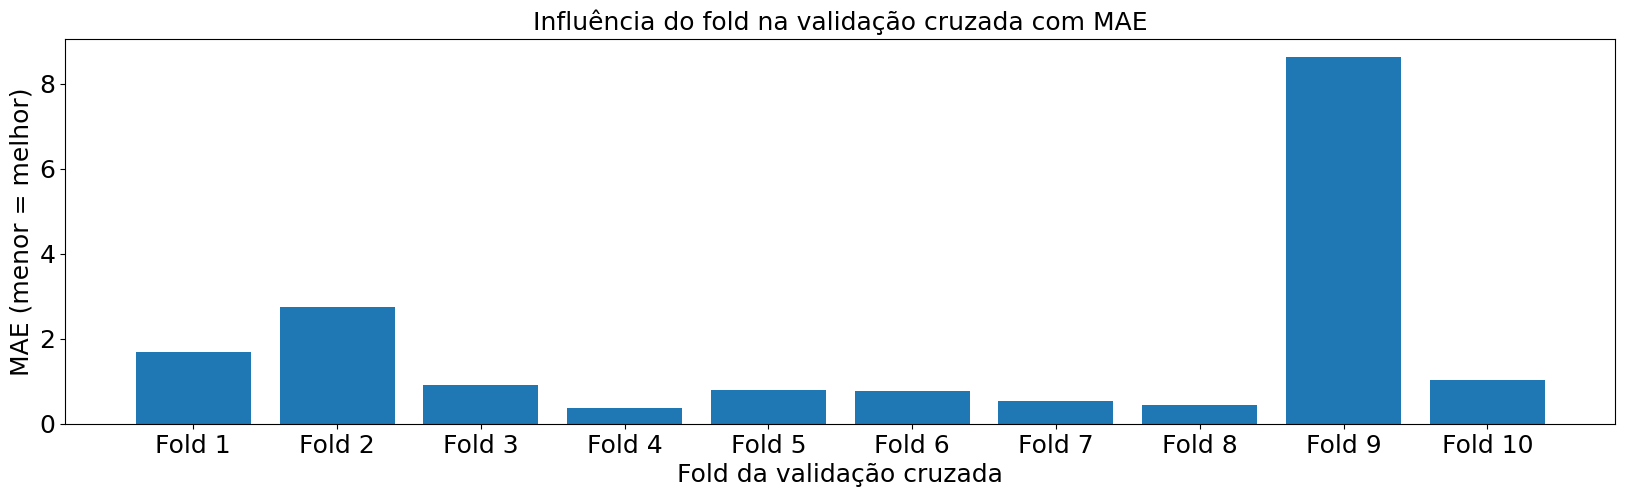

In [78]:
plt.figure(figsize=(20,5))
plt.bar(height=scores,x=['Fold '+str(i) for i in range(1,11)])
plt.xlabel('Fold da validação cruzada',size=18)
plt.ylabel('MAE (menor = melhor)',size=18)
plt.title('Influência do fold na validação cruzada com MAE',size=18)
plt.show()

In [79]:
y_mediamovel = y_test.rolling(window=10,closed='left').mean().dropna() #Eliminando horas sem média móvel

# Selecionando para validação os mesmos índices
X_valid = X.loc[y_mediamovel.index]
y_valid = y.loc[y_mediamovel.index]

In [80]:
metricas = []
for index_train, index_test in TimeSeriesSplit(n_splits=10).split(X_valid,y_valid):
    # Dados de treino
    x_tr = X_valid.iloc[index_train]
    y_tr = y_valid.iloc[index_train]
    x_te = X_valid.iloc[index_test]
    y_te = y_valid.iloc[index_test]
    y_mdmv = y_mediamovel[index_test]
    # Treinando um modelo e ajustando aos dados de treino
    model = RandomForestRegressor().fit(x_tr,y_tr)
    # Prevendo nos dados de teste
    y_pr = model.predict(x_te)
    # Calculando a métrica (MAE) no teste 
    mae_model = mean_absolute_error(y_te,y_pr)
    mae_mdmv = mean_absolute_error(y_te,y_mdmv)
    mae_relativo = mae_model/mae_mdmv
    metricas.append(mae_relativo)

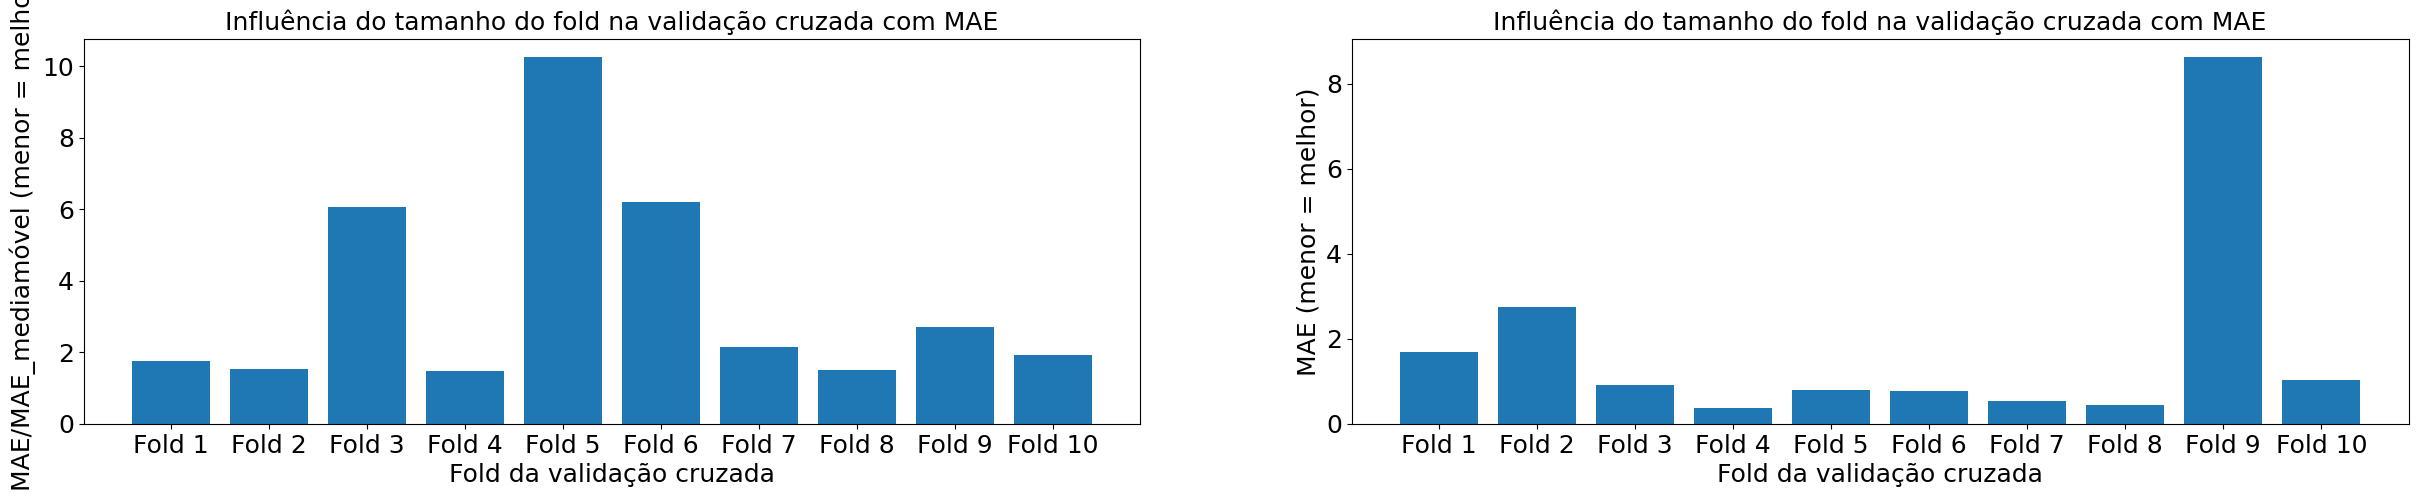

In [81]:
fig, ax = plt.subplots(1,2, figsize=(30,5))
ax[0].bar(height=metricas,x=['Fold '+str(i) for i in range(1,11)])
ax[0].set_xlabel('Fold da validação cruzada',size=18)
ax[0].set_ylabel('MAE/MAE_mediamóvel (menor = melhor)',size=18)
ax[0].set_title('Influência do tamanho do fold na validação cruzada com MAE',size=18)
ax[1].bar(height=scores,x=['Fold '+str(i) for i in range(1,11)])
ax[1].set_xlabel('Fold da validação cruzada',size=18)
ax[1].set_ylabel('MAE (menor = melhor)',size=18)
ax[1].set_title('Influência do tamanho do fold na validação cruzada com MAE',size=18)
plt.show()

In [82]:
param_grid = {
'max_features': ['auto', 'sqrt'],
'max_depth': [10, 50],
'min_samples_split': [2,5],
'min_samples_leaf': [1,5],
'n_estimators':[100, 200],
'bootstrap': [True, False]
} 


In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
rcv = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,cv=TimeSeriesSplit(n_splits=3),
                        scoring='neg_mean_absolute_error',verbose=True,n_jobs=8)
rcv.fit(X,y)

rcv.best_params_ 

Fitting 3 folds for each of 64 candidates, totalling 192 fits


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [85]:
melhores_parametros = {'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [86]:
modelo = RandomForestRegressor(**melhores_parametros).fit(X_train,y_train)
y_pred_final = pd.Series(modelo.predict(X),index=X.index)

<Axes: xlabel='date'>

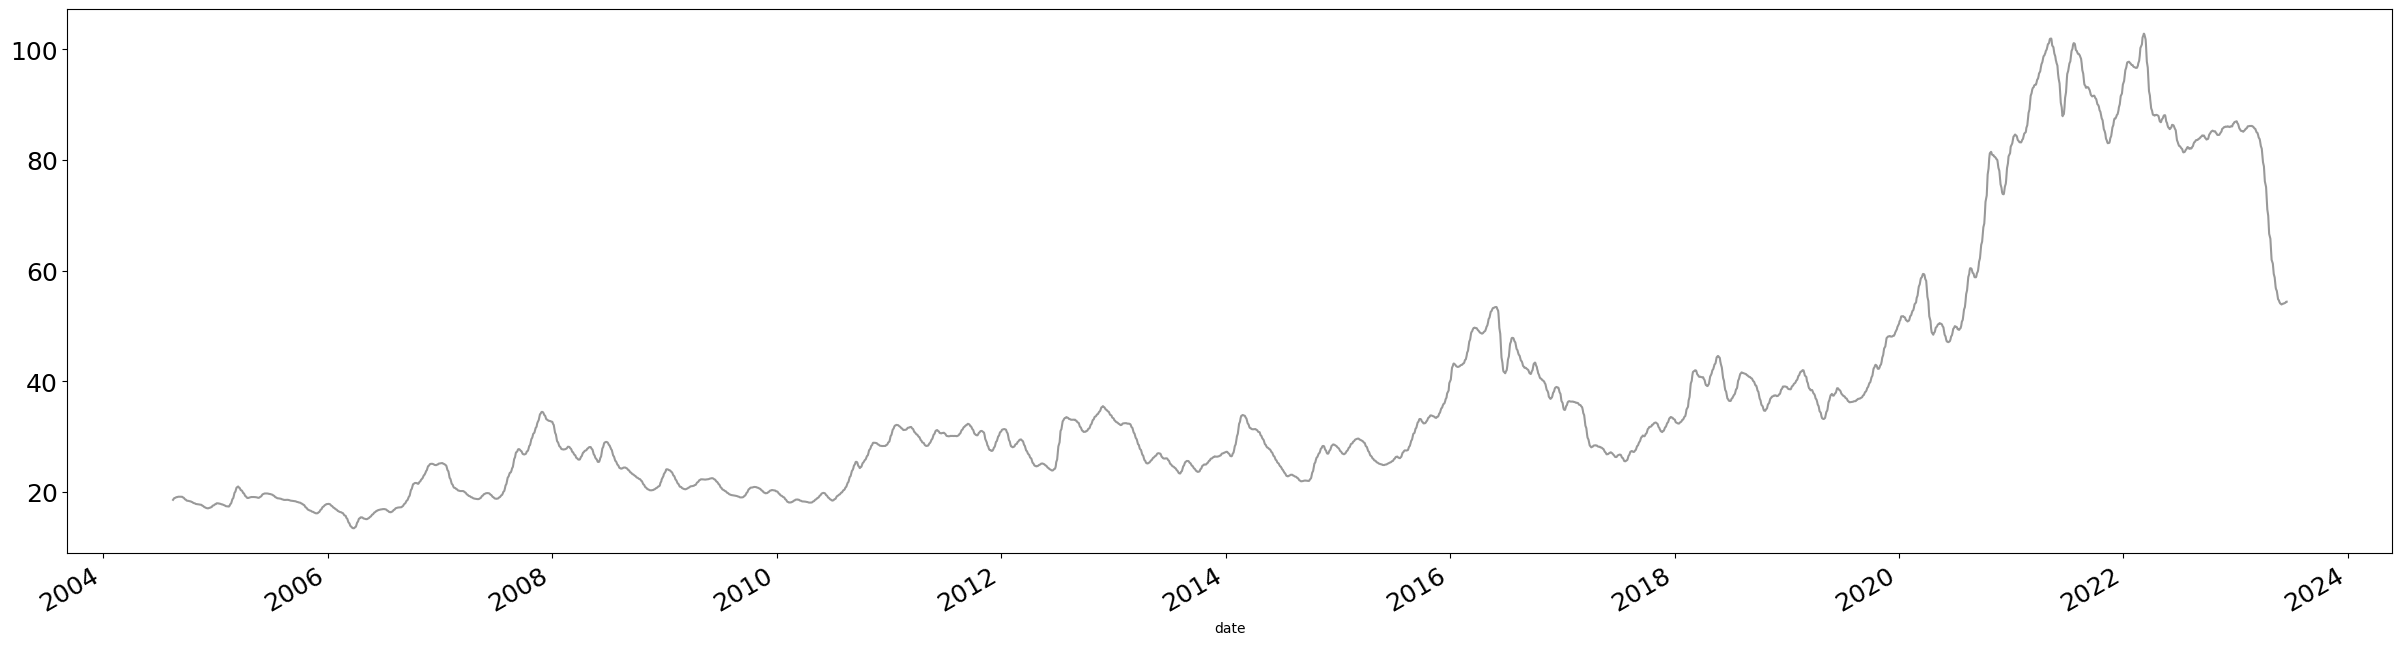

In [87]:
plt.figure(figsize=(30,8))
y.plot(c='grey',alpha=0.8) # Dados reais

In [88]:
x_pl = X[(X.index>='2018-04-01')]

y_plot = y[x_pl.index]
y_preds = y_pred_final[x_pl.index]

# Vamos comparar com uma média móvel de 180 dias!
y_mediamovel = y_test.rolling(window=10, closed='left').mean() #Eliminando horas sem média móvel
y_mdmv_plot = y_mediamovel[x_pl.index]

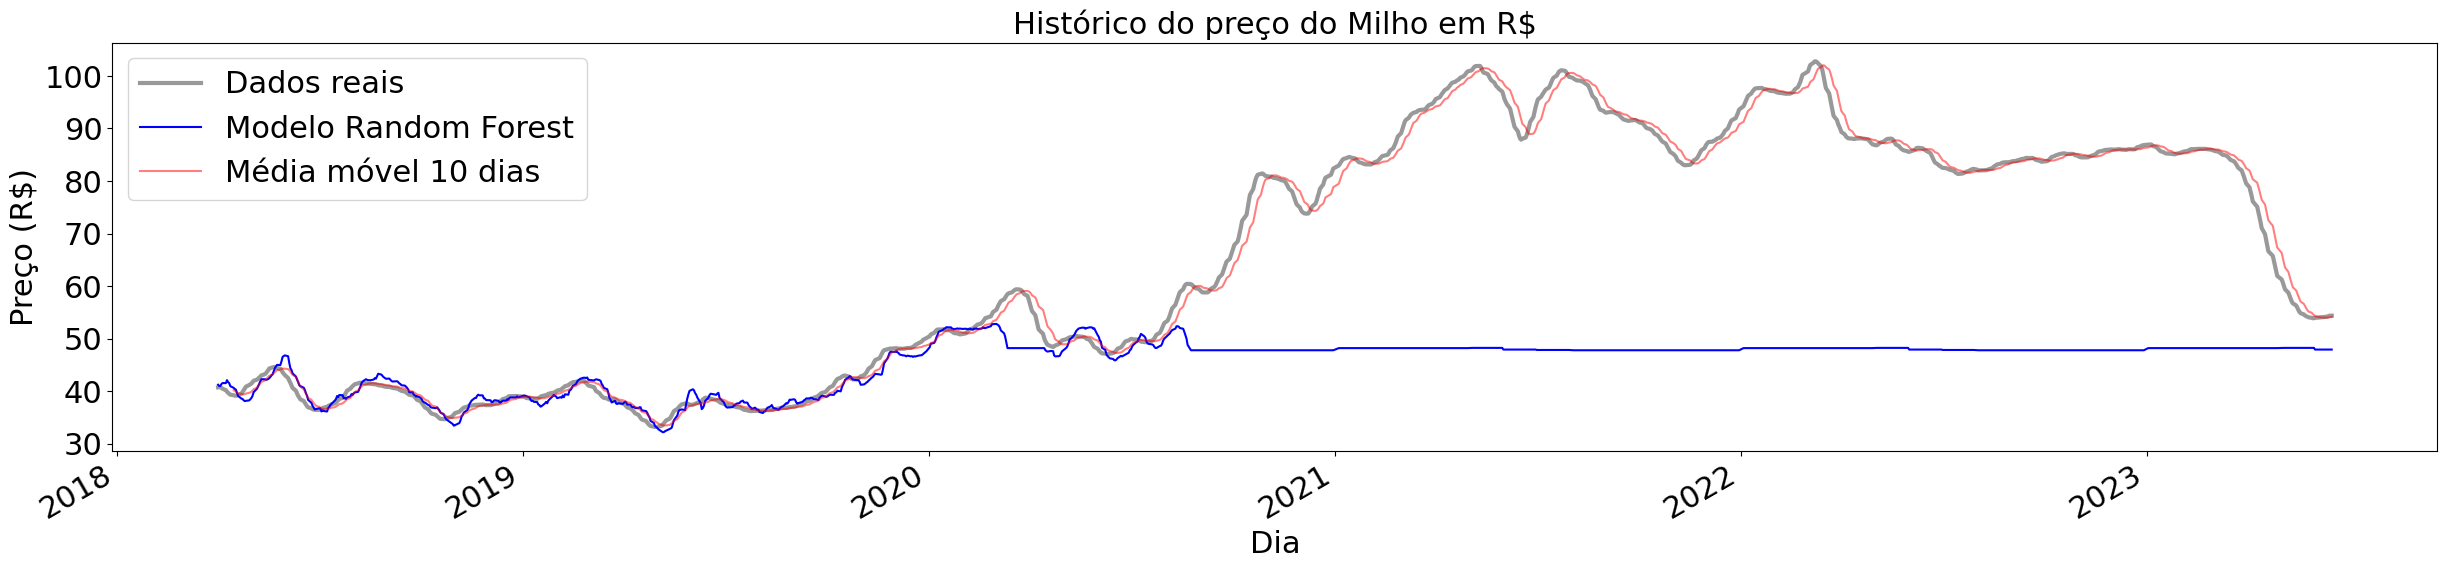

In [89]:
plt.figure(figsize=(30,6))
y_plot.plot(c='grey',alpha=0.8,linewidth=3) # Dados reais
y_preds.plot(c='blue') # Dados reais
y_mdmv_plot.plot(c='red',alpha=0.5) # Dados reais
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Dia',size=22)
plt.ylabel('Preço (R$)',size=22) 
plt.title('Histórico do preço do Milho em R$',size=22)
plt.legend(['Dados reais','Modelo Random Forest','Média móvel 10 dias'],fontsize=22)
plt.show()

In [90]:
y_train_pred = modelo.predict(X_train)
print('Performance do melhor modelo no treino')
print(mean_absolute_error(y_train,y_train_pred))
# Calculando a métrica no teste
y_test_pred = modelo.predict(X_test)
print('Performance do melhor modelo no teste')
print(mean_absolute_error(y_test,y_test_pred))

Performance do melhor modelo no treino
0.2911245356231279
Performance do melhor modelo no teste
20.85994681883888
